<a href="https://colab.research.google.com/github/pratap-vj/Topic-Modeling-on-News-Articles/blob/main/Topic_Modeling_on_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Topic Modeling on News Articles  -**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

The BBC News dataset is a collection of news articles from the BBC News website from 2004-2005, consisting of 2225 articles divided into five categories: Business, Entertainment, Politics, Sport, and Tech. The objective of this project is to create an aggregate dataset of all the news articles and perform topic modelling to identify the underlying, latent themes and topics present in the data, among the articles.

Topic modelling is a widely used technique in natural language processing that helps to extract topics from a large collection of documents. The algorithm analyzes the text data and identifies patterns of co-occurring words, thereby grouping similar words into topics. Two popular algorithms used for topic modelling are Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA). Both algorithms attempt to identify the underlying themes in the dataset by uncovering the latent semantic structure in the text.

In this project, the dataset from individual text files are read and consolidated into a single DataFrame with three columns - Title, Description and the Category. The Description column is carried forward for textual pre-processing, while the Category column provided as input is used to evaluate the accuracy of the model.

Firstly, the LDA algorithm is utilised to perform topic modelling on the BBC News dataset. The dataset is pre-processed by expanding contractions, removing punctuations, digits, whitespaces and stop words. Then Lemmatization is used to group together words to the word's lemma. The pre-processed data is then vectorized using the CountVectorizer from the scikit-learn library. On the vectorized data, the LDA algorithm is applied using Hyperparameter Tuning to identify the underlying topics in the dataset

Additionally, the LDA model is re-applied by using the TfidfVectorizer to vectorize the pre-processed dataset to study the variation in accuracy. A Null Hypotheses that using the CountVectorizer to tokenise input data for an LDA model provides more accurate results, over the TFIDF Vectorizer, is established. An LSA model is also applied on two tokenised inputs of the datasets - one using CountVectorizer and the other using TFIDFVectorizer - as a third model for the project. The LSA algorithm uses the truncated singular value decomposition (SVD) technique to reduce the dimensionality of the dataset and create a topic-term matrix. The topic-term matrix represents the weight of each term in each topic.

After identifying the latent topics, the models are evaluated by verifying whether these topics correspond to the different tags available as input. The identified topics are compared with the original tags for each article by using metrics such as Accuracy and individual topic precisions, recalls and F1 Scores. Finally, word-clouds are generated for each topic to better understand the most frequent words in each topic and whether they actually correspond to that topic or not.

# **GitHub Link -**

https://github.com/pratap-vj/Topic-Modeling-on-News-Articles

# **Problem Statement**


The challenge is to perform topic modeling on the BBC News dataset, consisting of news articles from 2004-2005 across five categories. The objective is to uncover the latent themes and topics present within the dataset and evaluate the accuracy of the topic modeling results. This involves selecting an appropriate algorithm, optimizing it, and interpreting the results through visualizations and evaluation metrics. The problem aims to gain insights into the content and categorization of the news articles for further analysis and understanding.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import random
import os
import glob
import re
import csv

import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from scipy.stats import ttest_ind

# Install and import contractions library
!pip install contractions
import contractions



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.4 MB/s eta 0:00:00


### Dataset Loading

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Function for organising one article into 'Title' and 'Description' Columns
def organise_data(df):
  df['Description'] = ''
  for row in df[df.columns.values[0]]:
    df['Description'] += ' ' + row
  df['Title'] = df.columns.values[0]
  df = pd.DataFrame(df[['Title', 'Description']].loc[0]).transpose()
  return df

# Function for reading files from one particular category
def read_from_folder(category, path):
  # Reading the first file in the new DataFrame for one particular category
  files = glob.glob(path + category + "/*.txt")
  df = pd.DataFrame(pd.read_table(files[0]))
  df = organise_data(df)

  # Reading the rest of the files in the category, assigning a column for the given category name, and concatenating to the above DataFrame
  # Exception handling was used to handle Unicode and Parse Errors
  for i in range(1, len(files)):
    try:
      next_df = pd.DataFrame(pd.read_table(files[i]))
    except UnicodeDecodeError:
      next_df = pd.DataFrame(pd.read_table(files[i], encoding = 'ISO-8859-1'))
    except pd.errors.ParserError:
      next_df = pd.DataFrame(pd.read_table(files[i], quoting=csv.QUOTE_NONE))
    next_df = organise_data(next_df)
    df = pd.concat([df, next_df], axis=0)
    df['Category'] = category.capitalize()
    df = df.reset_index(drop=True)
  return df

# Function for reading files from all categories and concatenating into one single DataFrame
def read_from_folders(categories, path):
  category_dict = dict()
  for category in categories:
    category_dict[category] = read_from_folder(category, path)
  final_data = pd.concat([category_dict[category] for category in categories], axis=0).reset_index(drop=True)
  return final_data


In [4]:
# Path and folder of dataset
path = '/content/drive/MyDrive/Copy of bbc/'
folders = ['business', 'entertainment', 'politics', 'sport', 'tech']

In [5]:
#Loading the Dataset
df = read_from_folders(folders, path)

### Dataset First View

In [6]:
# Dataset First Look
df.head()

Title  \
0  Yukos unit buyer faces loan claim   
1  Ad sales boost Time Warner profit   
2   Dollar gains on Greenspan speech   
3   US trade gap hits record in 2004   
4  High fuel prices hit BA's profits   

                                         Description  Category  
0   The owners of embattled Russian oil giant Yuk...  Business  
1   Quarterly profits at US media giant TimeWarne...  Business  
2   The dollar has hit its highest level against ...  Business  
3   The gap between US exports and imports hit an...  Business  
4   British Airways has blamed high fuel prices f...  Business

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(2225, 3)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2225 non-null   object
 1   Description  2225 non-null   object
 2   Category     2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df[df.duplicated()]

Title  \
237   Economy 'strong' in election year   
272    Jobs growth still slow in the US   
340   S Korea spending boost to economy   
345   Troubled Marsh under SEC scrutiny   
369    Singapore growth at 8.1% in 2004   
...                                 ...   
2205  Commodore finds new lease of life   
2213   Tough rules for ringtone sellers   
2214   Kenyan school turns to handhelds   
2216   Software watching while you work   
2223     Camera phones are 'must-haves'   

                                            Description  Category  
237    UK businesses are set to prosper during the n...  Business  
272    The US created fewer jobs than expected in Ja...  Business  
340    South Korea will boost state spending next ye...  Business  
345    The US stock market regulator is investigatin...  Business  
369    Singapore's economy grew by 8.1% in 2004, its...  Business  
...                                                 ...       ...  
2205   The once-famous Commodore computer brand coul...      Tech  
2213   Firms that flout rules on how ringtones and o...      Tech  
2214   At the Mbita Point primary school in western ...      Tech  
2216   Software that can not only monitor every keys...      Tech  
2223   Four times more mobiles with cameras in them ...      Tech  

[100 rows x 3 columns]

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

100

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

Title          0
Description    0
Category       0
dtype: int64

In [12]:
# Missing Value Count Function
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


<Axes: >

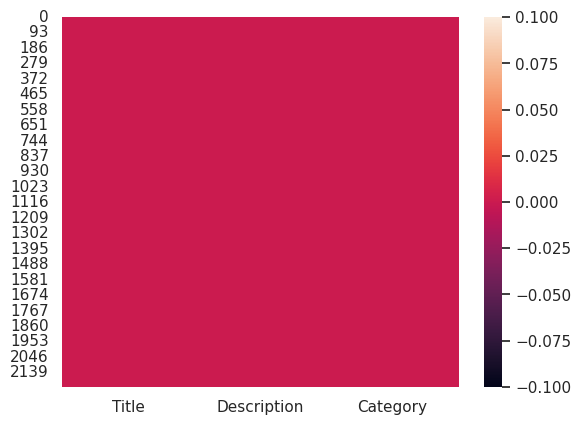

In [13]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

The dataset is a collection of articles from BBC News Agency. We have to identify and categorise the different latent topics present in it.

The following information was learnt from a basic analysis of the dataset

- The dataset has 2225 rows (articles) and 3 columns (Title, Description and Category)
- 100 duplicate rows/articles are present in the dataset
- No missing or null values are present

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns.values

array(['Title', 'Description', 'Category'], dtype=object)

In [15]:
# Dataset Describe
df.describe(include = 'object')

Title  \
count                              2225   
unique                             2096   
top     Ocean's Twelve raids box office   
freq                                  2   

                                              Description Category  
count                                                2225     2225  
unique                                               2090        5  
top      The man who said he got Oscar-nominated movie...    Sport  
freq                                                    2      511

### Variables Description

Each column is a string object, each row describing each article from the BBC News Dataset
The columns were

**Title -** Article title

**Description -** The article content

**Category -** Article category/tag (given as input)

The highest number of articles provided were from the Sports category (with 511 articles) and the lowest number belonging to that of Entertainment Category (with 386 articles) (NOTE: these numbers includes duplicate values which will be handled in Data Wrangling section)

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Title is 2096 .
No. of unique values in  Description is 2090 .
No. of unique values in  Category is 5 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Making a copy of the original dataset
data = df.copy()

# Removing duplicate values
data.drop_duplicates(inplace=True, ignore_index = True)

In [18]:
# Checking shape of data
data.shape

(2125, 3)

In [19]:
# Number of duplicates removed from each category
(df['Category'].value_counts() - data['Category'].value_counts()).sort_values()

Business          7
Sport             8
Politics         14
Entertainment    17
Tech             54
Name: Category, dtype: int64

In [20]:
#length of the news
data['length']=data.Description.str.len()

#function to count the number of words in the article
def word_count(article):
  return len(article.split(" "))

# Getting word count of each article
data['word_count']=data['Description'].apply(word_count)

#Description of these new variable
data.describe()

length   word_count
count   2125.000000  2125.000000
mean    2227.258824   380.044706
std     1378.658114   241.621473
min      469.000000    85.000000
25%     1405.000000   241.000000
50%     1922.000000   326.000000
75%     2764.000000   467.000000
max    25397.000000  4429.000000

In [21]:
#Total number of words present in the whole corpus
Total_words=sum(data['word_count'])
Total_words

807595

In [22]:
# Percentage of Types of news in the dataset
# Calculate the value counts of each category
category_counts = data['Category'].value_counts()

# Calculate the percentage of each category
category_percentages = category_counts / len(data) * 100

# Display the result
print(category_percentages)

Business         23.670588
Sport            23.670588
Politics         18.964706
Entertainment    17.364706
Tech             16.329412
Name: Category, dtype: float64


In [23]:
# Calculate the value counts of each category
category_counts = data['Category'].value_counts()

# Calculate the percentage of each category
category_percentages = category_counts / len(data) * 100

# Display the result
print(category_percentages)

Business         23.670588
Sport            23.670588
Politics         18.964706
Entertainment    17.364706
Tech             16.329412
Name: Category, dtype: float64


In [24]:
# Manipulated data view
data.head()

Title  \
0  Yukos unit buyer faces loan claim   
1  Ad sales boost Time Warner profit   
2   Dollar gains on Greenspan speech   
3   US trade gap hits record in 2004   
4  High fuel prices hit BA's profits   

                                         Description  Category  length  \
0   The owners of embattled Russian oil giant Yuk...  Business    1514   
1   Quarterly profits at US media giant TimeWarne...  Business    2520   
2   The dollar has hit its highest level against ...  Business    2216   
3   The gap between US exports and imports hit an...  Business    1915   
4   British Airways has blamed high fuel prices f...  Business    2362   

   word_count  
0         259  
1         416  
2         380  
3         322  
4         401

### What all manipulations have you done and insights you found?


During the dataset wrangling process, several steps were taken to prepare the data for natural language processing. While reading the dataset, most of the wrangling tasks were performed. Additionally, as there were no null or missing values in the dataset, the focus was on removing duplicate values.

After removing duplicate values, the dataset was reduced to 2125 unique articles. Among the categories, the Tech category had the highest number of duplicate items, resulting in the removal of 54 articles. In addition, 7 articles were removed from the Business category, 8 articles from the Sports category, 14 articles from the Politics category, and 17 articles from the Entertainment category. Overall, a total of 100 duplicate articles were removed from the dataset.

Then the length of each news article in terms of characters and counts the number of words in each article is calculated. These manipulations help understand the size and complexity of the articles. The length of the articles provides insights into their sizes, while the word count gives information about the text complexity and content. Analyzing these metrics can reveal patterns or anomalies in the data, aiding further analysis and decision-making.

This process ensured that the dataset was cleaned and ready for further analysis using natural language processing techniques.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-  Bar plot of number of articles in each category

In [25]:
data['Category'].value_counts()

Business         503
Sport            503
Politics         403
Entertainment    369
Tech             347
Name: Category, dtype: int64

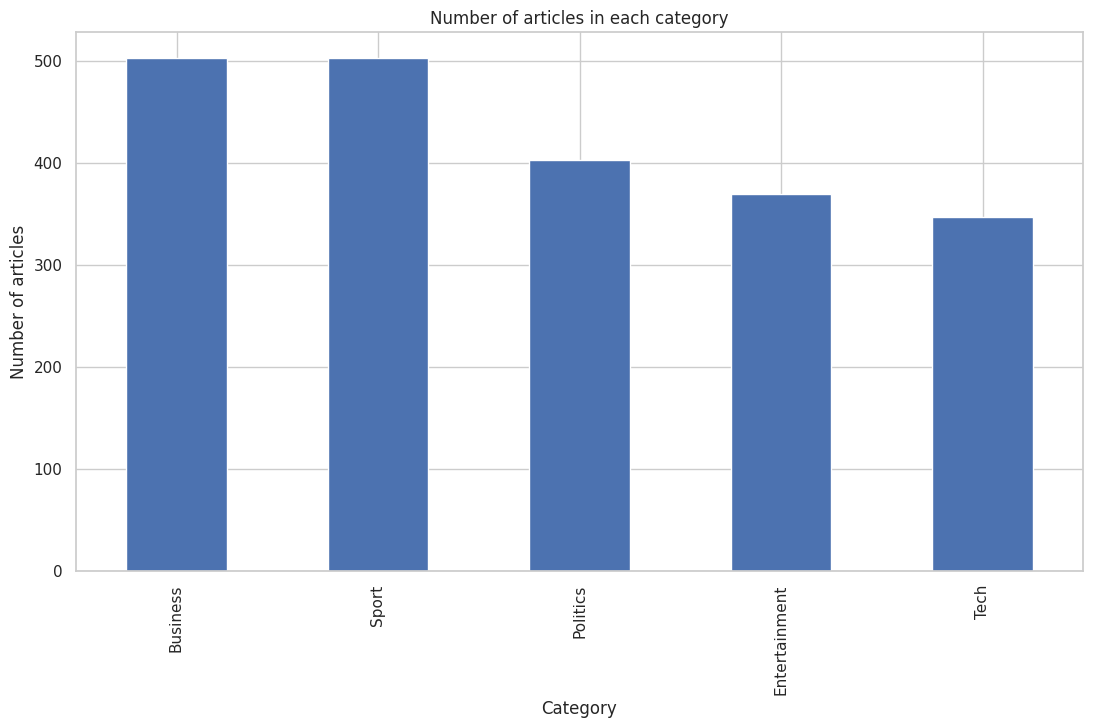

In [26]:
# Chart - 1 visualization code
data['Category'].value_counts().plot(kind='bar', figsize = (13,7), title = 'Number of articles in each category', xlabel = 'Category', ylabel = 'Number of articles')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot was selected to provide a visual representation of the distribution of articles across the five given categories. This plot allows for a clear comparison of the number of articles in each category, enabling easy identification of any variations or imbalances in the dataset.

By examining the bar plot, it becomes apparent how the articles are distributed among the categories. The height of each bar corresponds to the number of articles in the respective category. This visual representation allows for a quick assessment of the relative sizes of the categories and provides insights into the dataset's composition.

The bar plot serves as a useful tool for visualizing the distribution of articles, enabling researchers and analysts to gain a better understanding of the dataset's content. It facilitates the identification of categories that may have a higher or lower representation, which can inform further analysis and decision-making processes.

##### 2. What is/are the insight(s) found from the chart?

The bar plot clearly shows that the Business and Sport categories have the highest number of articles, indicating their prominence in the dataset after removing duplicate data. In contrast, the Tech category has the lowest number of articles, suggesting a relatively smaller representation. This visual representation helps understand the distribution of articles across categories at a glance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights can have a positive business impact by enabling targeted marketing, guiding content strategy, and facilitating revenue generation. However, the lower representation of articles in the Tech category may lead to a missed opportunity in the technology market, potentially resulting in negative growth. To mitigate this, businesses can focus on increasing their presence and engagement in the Tech category to tap into its potential and avoid negative growth consequences.

#### Chart - 2 - Density plot for analysing the distribution of article length for each category

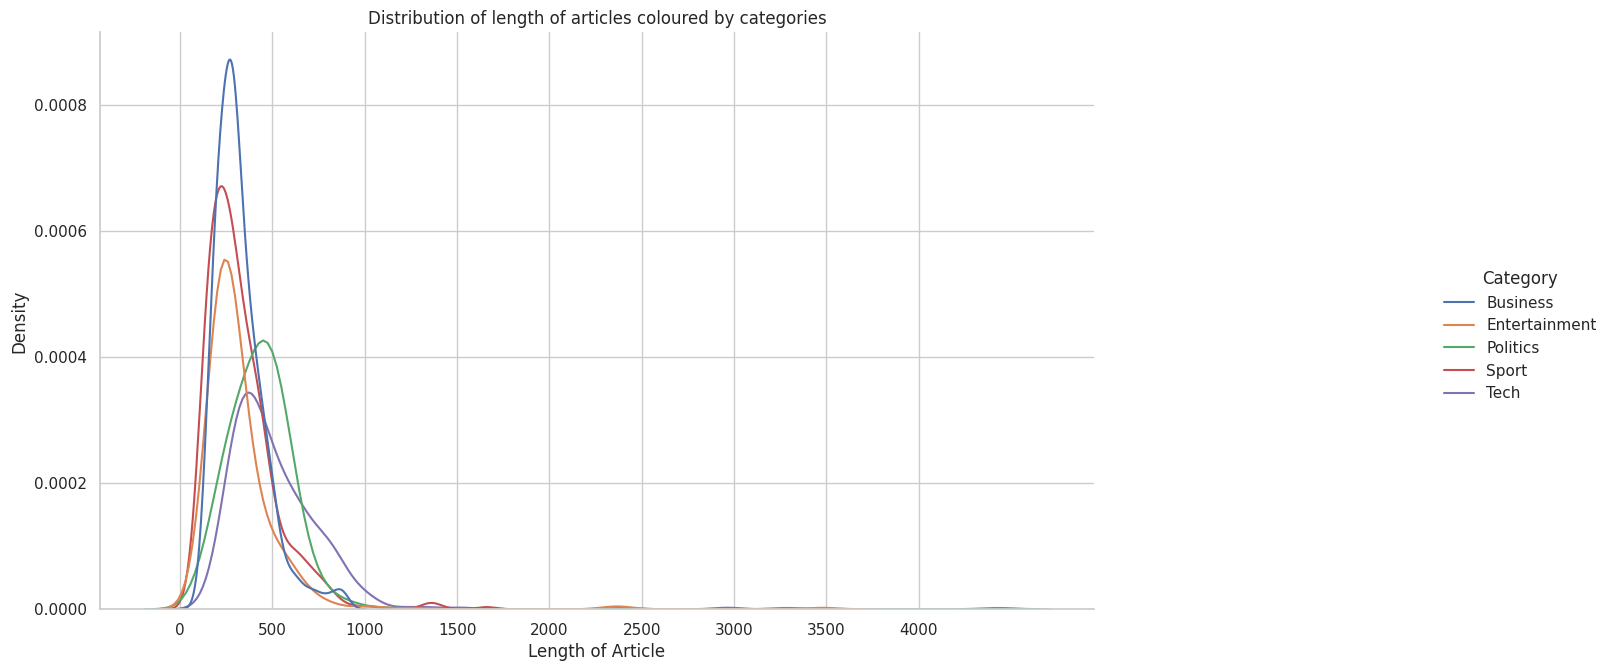

In [27]:
# Chart - 2 visualization code
figu = sns.displot(x = data['Description'].str.split(' ').apply(len), hue = data['Category'], kind = 'kde')
figu.figure.set_size_inches(18,7)
figu.set(title = f'Distribution of length of articles coloured by categories', xlabel = 'Length of Article', xticks = range(0,4500,500))
plt.show()

##### 1. Why did you pick the specific chart?

The chart illustrates the distribution of article lengths across different categories. By using a density plot, the visualization emphasizes the specific patterns in the distribution of word counts within each category. The plot combines the articles from all categories, allowing us to compare and contrast the individual distributions to identify any variations. This analysis helps to identify differences in article lengths and understand how they vary across different categories.

##### 2. What is/are the insight(s) found from the chart?


Upon examination, it is evident that the majority of articles have a word count of around 250. However, when considering articles from the politics category, it becomes apparent that they tend to be longer in terms of word count compared to articles from other categories. This indicates that political articles generally contain more extensive content and may delve into more in-depth analysis and discussions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights regarding the distribution of article lengths and the variations among different categories can potentially contribute to a positive business impact. By understanding the typical word count and distribution patterns, businesses can optimize their content creation strategies. They can tailor their articles based on the preferences and engagement levels of their target audience.

However, there are no specific insights from the provided information that directly indicate negative growth. The analysis primarily focuses on descriptive statistics of article length and word count distribution. To determine any negative impact, further analysis and context regarding business goals, audience engagement, and content strategy would be required.

#### Chart - 3- Distribution of different types of articles

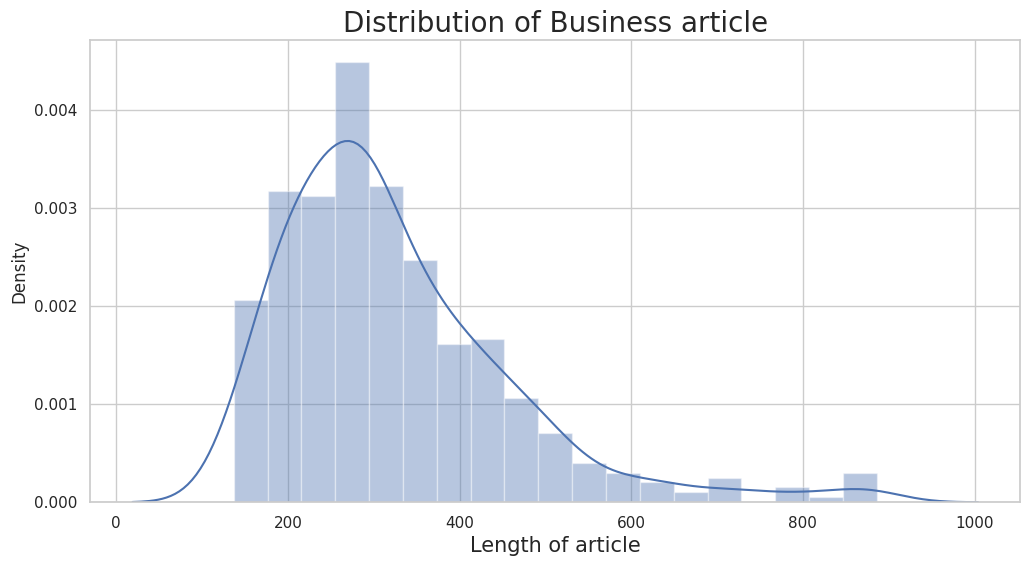

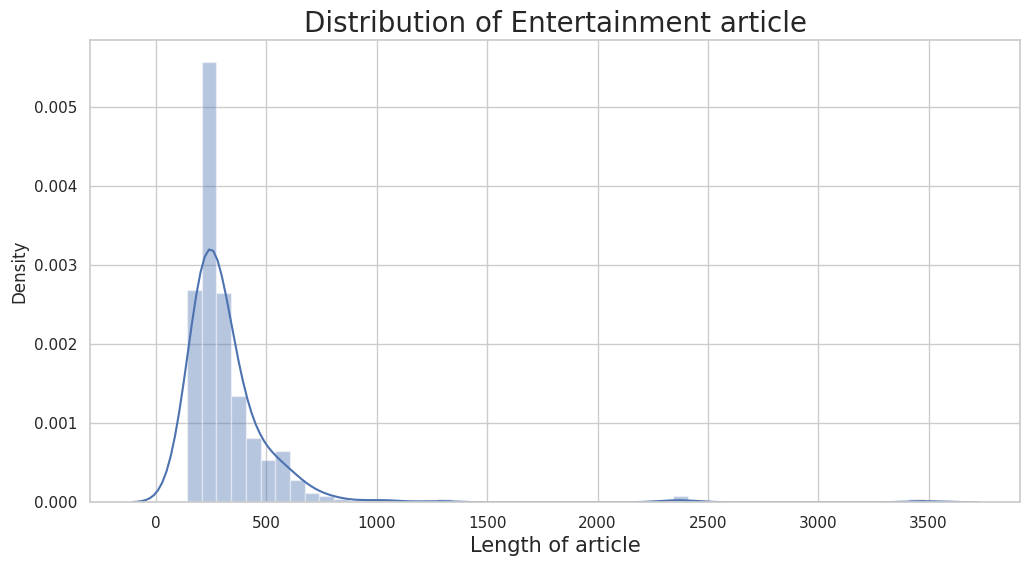

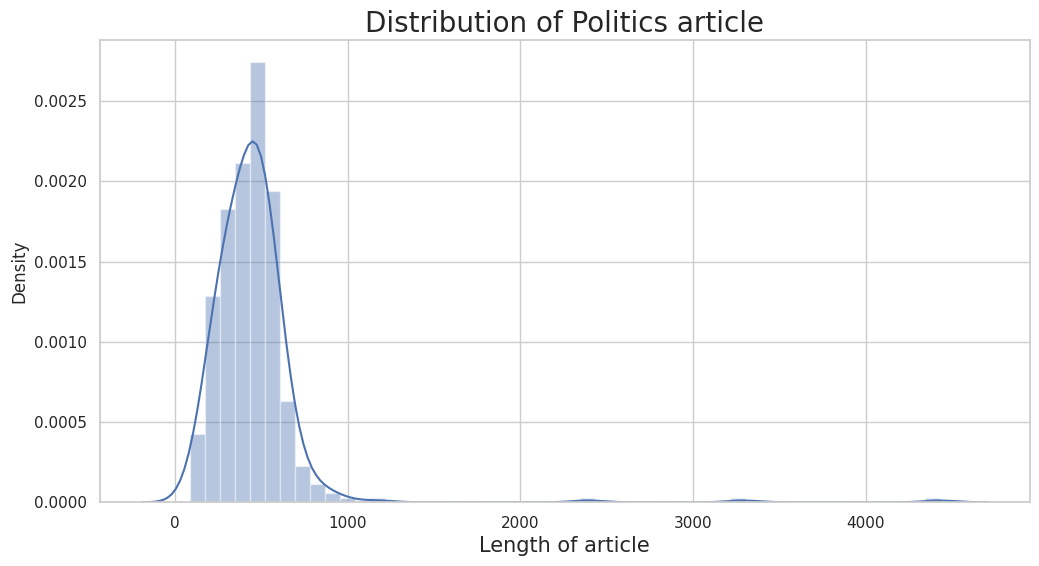

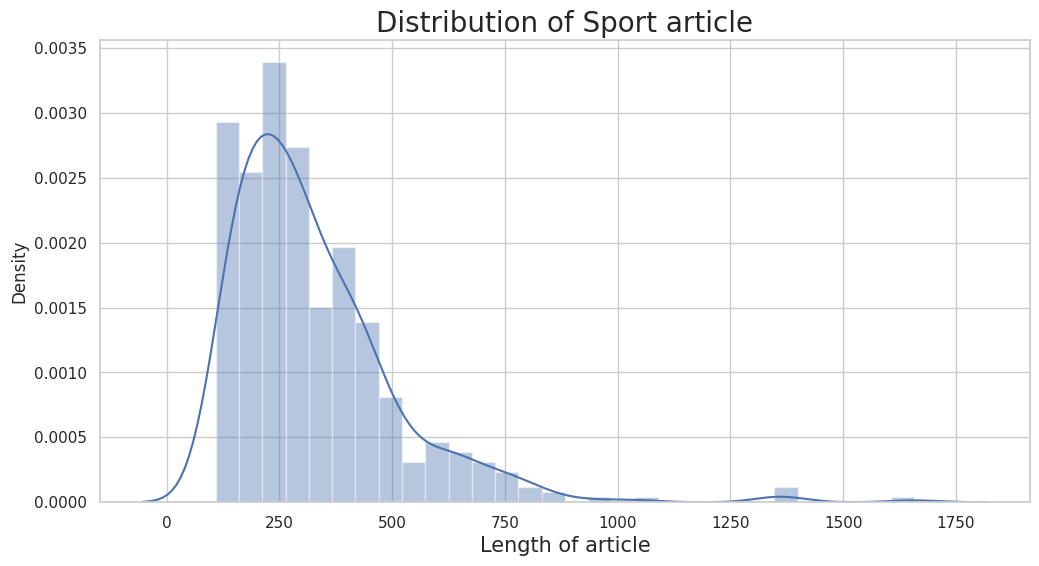

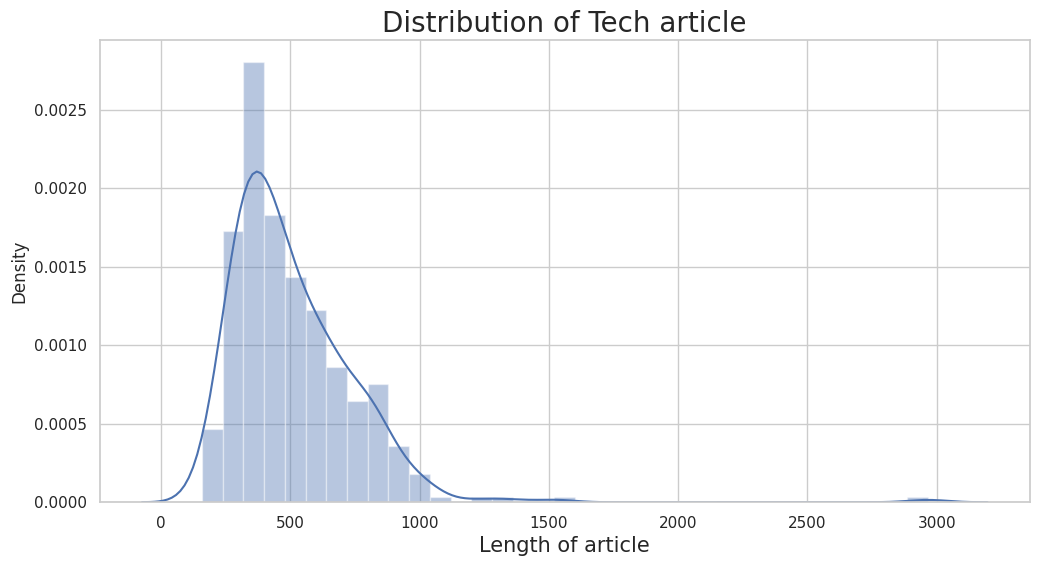

In [28]:
# Chart - 3 visualization code
# Distribution of different types of articles
types_article=list(data['Category'].unique())
for article in types_article:
  df_article=data[data['Category']==article]
  plt.figure(figsize=(12,6))
  fig=sns.distplot(x=df_article['word_count'])
  fig.set_title(f'Distribution of {article} article',size=20)
  fig.set_xlabel('Length of article',size=15)

##### 1. Why did you pick the specific chart?


The specific chart chosen, which is a distribution plot (histogram), helps visualize the distribution of article lengths for each category. It provides insights into the range of word counts and the frequency of articles falling within different length intervals.

This chart was selected because it allows us to compare the distributions of article lengths across different categories in a single visualization. By plotting the distribution of each category separately, we can identify any variations or patterns in the article lengths within each category.

The distribution plot also provides a smooth density curve, which helps in understanding the overall shape and skewness of the distribution. It enables us to observe any significant differences or similarities in the article length distributions among the categories.

##### 2. What is/are the insight(s) found from the chart?


Upon analyzing the distribution of article lengths across different categories, it is notable that a significant number of articles fall within the range of approximately 200 to 300 words. This suggests that a substantial portion of the articles in the dataset have relatively similar lengths, indicating a commonality in the way news articles are written or structured.

However, when examining the articles specifically from the politics category, a distinct pattern emerges. Unlike other categories where the majority of articles have shorter word counts, the politics category exhibits a different trend. Political articles tend to be longer in terms of word count compared to articles from other categories.

The longer word count in political articles could be attributed to various factors. Firstly, political news often involves complex and intricate subjects, such as government policies, international relations, and socio-political issues. These topics require in-depth analysis, explanation, and contextual information, leading to a higher word count to effectively convey the details.

Furthermore, political articles may include quotes, statements, or speeches from political figures, which contribute to the overall length. Additionally, political news articles often involve discussions of multiple perspectives, debates, or arguments, necessitating more extensive coverage to provide a comprehensive understanding of the topic.

The longer word count in political articles suggests a greater emphasis on providing detailed information, analysis, and context surrounding political events and developments. It indicates a focus on presenting a comprehensive view of political matters, allowing readers to gain a deeper understanding of the issues at hand.

From a business perspective, these insights can be valuable in several ways. For news organizations or publishers specializing in political coverage, the longer article lengths indicate a need for in-depth and comprehensive reporting to cater to the interests and expectations of their audience. This insight can guide content planning and resource allocation, ensuring that political articles meet the requirements and preferences of readers.

However, it is essential to balance the longer word count with readability and engagement. While political articles may require more extensive coverage, it is crucial to maintain a clear and engaging writing style to retain the interest of readers. Careful editing and structuring of the content can help ensure that the longer articles remain informative, coherent, and accessible to the target audience.

In conclusion, the analysis of article lengths reveals that political articles tend to have longer word counts compared to articles from other categories. This finding highlights the need for in-depth coverage and comprehensive analysis in political news, catering to the complexities and nuances of the subject matter. Understanding these insights can assist news organizations in delivering high-quality political content and engaging their audience effectively.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from understanding article lengths and the characteristics of political articles can positively impact business outcomes by informing content strategies, enhancing audience engagement, and creating monetization opportunities. By addressing potential challenges related to readability and resource allocation, businesses can maximize the positive impact and mitigate any negative effects, allowing them to thrive in the competitive news industry.

## ***5. Hypothesis Testing***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Research Question:** Is there a significant difference in the average article length between the politics category and the other categories?

**Null Hypothesis (H0):** The average article length for the politics category is equal to the average article length for the other categories.

**Alternative Hypothesis (H1):** The average article length for the politics category is different from the average article length for the other categories.

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value

# Extract the article lengths for the politics category
politics_lengths = data[data['Category'] == 'politics']['word_count']

# Extract the article lengths for the other categories
other_lengths = data[data['Category'] != 'politics']['word_count']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(politics_lengths, other_lengths, equal_var=False)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The two-sample t-test is used to calculate the p-value. The p-value is used to determine if there is a significant difference in the mean article lengths between the politics category and the other categories. A lower p-value indicates stronger evidence for a significant difference.

##### Why did you choose the specific statistical test?

The specific statistical test, the two-sample t-test, was chosen because it is suitable for comparing the means of two independent samples. In this case, we are comparing the mean article lengths between the politics category and the other categories. The t-test assumes that the data is approximately normally distributed, which is reasonable to assume for this analysis. Additionally, the t-test is widely used for hypothesis testing when comparing two groups, making it a suitable choice for this scenario.






## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [30]:
# Handling Missing Values & Missing Value Imputation

# Missing Value Count Function
def show_missing():
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(data[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(data[show_missing()].isnull().sum().sort_values(ascending = False)/len(data)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


<Axes: >

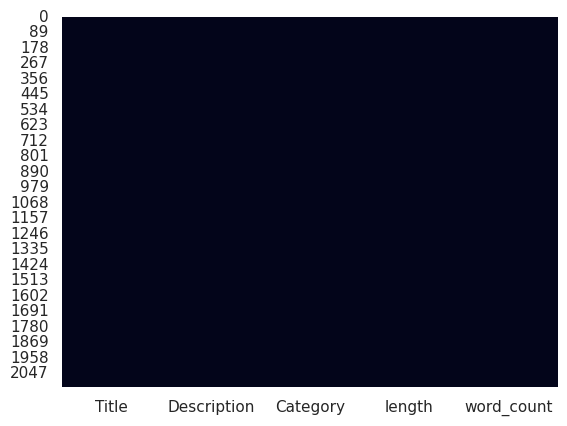

In [31]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing value present in dataset.

### 2. Handling Outliers

Outlier treatment is not typically required in topic modeling. Topic modeling is a text analysis technique used to identify underlying themes or topics in a collection of documents. It focuses on the distribution of words and their co-occurrence patterns within the text data.

Outliers in topic modeling refer to individual documents that deviate significantly from the overall patterns in the corpus. However, these outliers can still contain valuable information and contribute to the understanding of the data. Removing outliers in topic modeling may lead to the loss of important insights or obscure certain topics that are represented in a few distinct documents.

### 3. Categorical Encoding

In topic modeling, the input data typically consists of textual documents rather than categorical variables. Therefore, traditional categorical encoding techniques like one-hot encoding or label encoding are not directly applicable to the text data itself.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [32]:
# Expand Contraction
data.loc[1, 'Description']


' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier. The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL. Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s existing customers for high-sp

In [33]:
# Function for expanding contracted words
def expand_contractions(text):
  '''Expands contractions in textual data'''
  expanded_words = []
  for word in text.split():
    expanded_words.append(contractions.fix(word))
  return ' '.join(expanded_words)

In [34]:
data['Description'] = data['Description'].apply(expand_contractions)


#### 2. Lower Casing

In [35]:
# Lower Casing
def make_lower(text):
  return text.lower()

In [36]:
data['Description'] = data['Description'].apply(make_lower)

#### 3. Removing Punctuations

In [37]:
# Remove Punctuations

def remove_punc(text):
  return re.sub(r'\W',' ',text)

In [38]:
data['Description'] = data['Description'].apply(remove_punc)

In [39]:
data.loc[1, 'Description']

'quarterly profits at us media giant timewarner jumped 76  to  1 13bn   600m  for the three months to december  from  639m year earlier  the firm  which is now one of the biggest investors in google  benefited from sales of high speed internet connections and higher advert sales  timewarner said fourth quarter sales rose 2  to  11 1bn from  10 9bn  its profits were buoyed by one off gains which offset a profit dip at warner bros  and less users for aol  time warner said on friday that it now owns 8  of search engine google  but its own internet business  aol  had has mixed fortunes  it lost 464 000 subscribers in the fourth quarter profits were lower than in the preceding three quarters  however  the company said aol s underlying profit before exceptional items rose 8  on the back of stronger internet advertising revenues  it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol s existing customers for high speed

**Punctuations have been removed from the dataset.**

#### 4. Removing URLs & Removing words and digits contain digits.

In [40]:
# Remove URLs
data['Description'].str.contains('http').sum()

0

**No URLs are present in the Dataset.**

In [41]:
# Functions for removing digits and whitespaces using re library
def remove_digits(text):
  return re.sub(r'\d',' ',text)

def remove_whitespace(text):
  return re.sub(r'\s+',' ',text)


In [42]:
data['Description'] = data['Description'].apply(remove_digits)
data['Description'] = data['Description'].apply(remove_whitespace)


In [43]:
data.loc[1, 'Description']

'quarterly profits at us media giant timewarner jumped to bn m for the three months to december from m year earlier the firm which is now one of the biggest investors in google benefited from sales of high speed internet connections and higher advert sales timewarner said fourth quarter sales rose to bn from bn its profits were buoyed by one off gains which offset a profit dip at warner bros and less users for aol time warner said on friday that it now owns of search engine google but its own internet business aol had has mixed fortunes it lost subscribers in the fourth quarter profits were lower than in the preceding three quarters however the company said aol s underlying profit before exceptional items rose on the back of stronger internet advertising revenues it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aol s existing customers for high speed broadband timewarner also has to restate and results followi

**Digits and whitespaces removed from the dataset.**

#### 5. Removing Stopwords

In [44]:
# function of Removing Stopwords

def remove_stopwords(text, stop_words):
  '''Removes stopwords (given as input)  from text'''
  text = [word for word in text.split() if word.lower() not in stop_words]
  return ' '.join(text)

In [45]:
# Remove Stopwords
stop_words = stopwords.words('english')
data['Description'] = data['Description'].apply(remove_stopwords, stop_words = stop_words)

In [46]:
data.loc[1, 'Description']

'quarterly profits us media giant timewarner jumped bn three months december year earlier firm one biggest investors google benefited sales high speed internet connections higher advert sales timewarner said fourth quarter sales rose bn bn profits buoyed one gains offset profit dip warner bros less users aol time warner said friday owns search engine google internet business aol mixed fortunes lost subscribers fourth quarter profits lower preceding three quarters however company said aol underlying profit exceptional items rose back stronger internet advertising revenues hopes increase subscribers offering online service free timewarner internet customers try sign aol existing customers high speed broadband timewarner also restate results following probe us securities exchange commission sec close concluding time warner fourth quarter profits slightly better analysts expectations film division saw profits slump helped box office flops alexander catwoman sharp contrast year earlier thir

**Stopwords have been removed from the dataset. Now, let's see the top 10 words in the dataset**

#### 6. Tokenization

In [47]:
# Tokenization

def top_n_words_features(count_vectorizer, text, n_words):
    '''
    Returns a tuple. First element being a dataframe containing the top n words
    in a sample and their counts, given a CountVectorizer object and text sample
    Second element is the total number of unique words/features tokenised
    '''
    vectorized = count_vectorizer.fit_transform(text)
    tokens_df = pd.DataFrame(vectorized.todense(), columns = count_vectorizer.get_feature_names_out())
    top_df = pd.DataFrame(tokens_df.sum().sort_values(ascending=False).head(n_words)).rename(columns = {0:'Occurences'})
    return top_df, len(count_vectorizer.get_feature_names_out())

In [48]:
vectorizer = CountVectorizer()
top_words, n_features_raw = top_n_words_features(vectorizer, data['Description'], 10)

<Axes: >

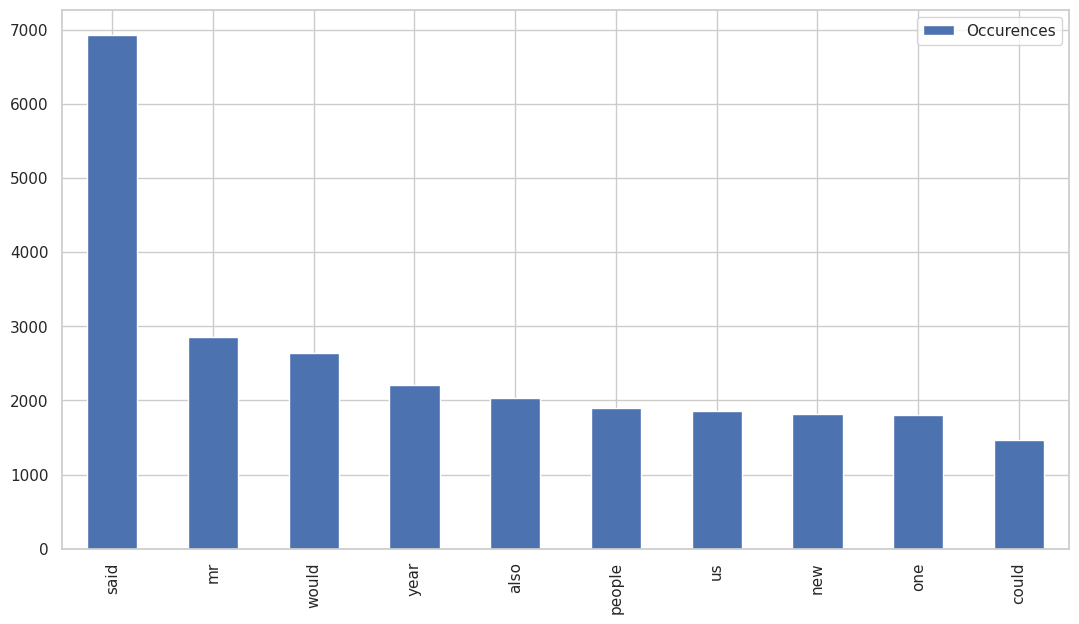

In [49]:
top_words.plot(kind='bar', figsize = (13,7))

In [50]:
n_features_raw

27573

**It can be observed that there are 27573 unique words in the dataset. This is still a high number, and dimensionality reduction is required.**

#### 7. Text Normalization

In [51]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Required downloads for Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [52]:
# Function for lemmatizing the verbs
def lemmatize_(text, lemmatizer):
  text = [lemmatizer.lemmatize(word, pos='v') for word in text.split()]
  return ' '.join(text)

In [53]:
lemmatiser =  WordNetLemmatizer()
data['Description'] = data['Description'].apply(lemmatize_, lemmatizer = lemmatiser)

In [54]:
top_words, n_features = top_n_words_features(vectorizer, data['Description'], 10)

In [55]:
top_words.plot(kind='bar', figsize = (13,7))

<Axes: >

In [56]:

n_features

22545

##### Which text normalization technique have you used and why?

- The number of unique features has been reduced to 22545

- Here, Text lemmetization is chosen over stemming because the former is preferred for contextual analysis, i.e., the context in which word is used is important. Since this is crucial for Topic Modelling, Lemmatization is preferred

**It can be observed that, a few very frequent words like "say", "mr", "would", "also" etc do not contribute to decision of a Topic/category. Hence these words, on account of being too frequent, could be eliminated.**

In [57]:
# Removing further Stopwords
stop_words.extend(['say', 'mr', 'would', 'also'])
data['Description'] = data['Description'].apply(remove_stopwords, stop_words = stop_words)

In [58]:
top_n_words_features(vectorizer, data['Description'], 10)[0].plot(kind='bar', figsize = (13,7))

<Axes: >

#### 8. Part of speech tagging


Parts of speech (POS) tagging is not strictly required for topic modeling, but it can be beneficial in some cases.

Topic modeling algorithms, such as Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF), typically operate on a bag-of-words representation of the text data. In this representation, the order of words is disregarded, and only the frequency or occurrence of words in a document is considered. POS tagging, on the other hand, focuses on the grammatical structure of the text and assigns labels to words based on their syntactic role.

#### 9. Text Vectorization

In [59]:
# Vectorizing Text

tokeniser = CountVectorizer(max_df = 0.95, min_df = 0.02)
tokenised_data = tokeniser.fit_transform(data['Description'])

In [60]:
top_words, n_features = top_n_words_features(tokeniser, data['Description'], 10)

<Axes: >

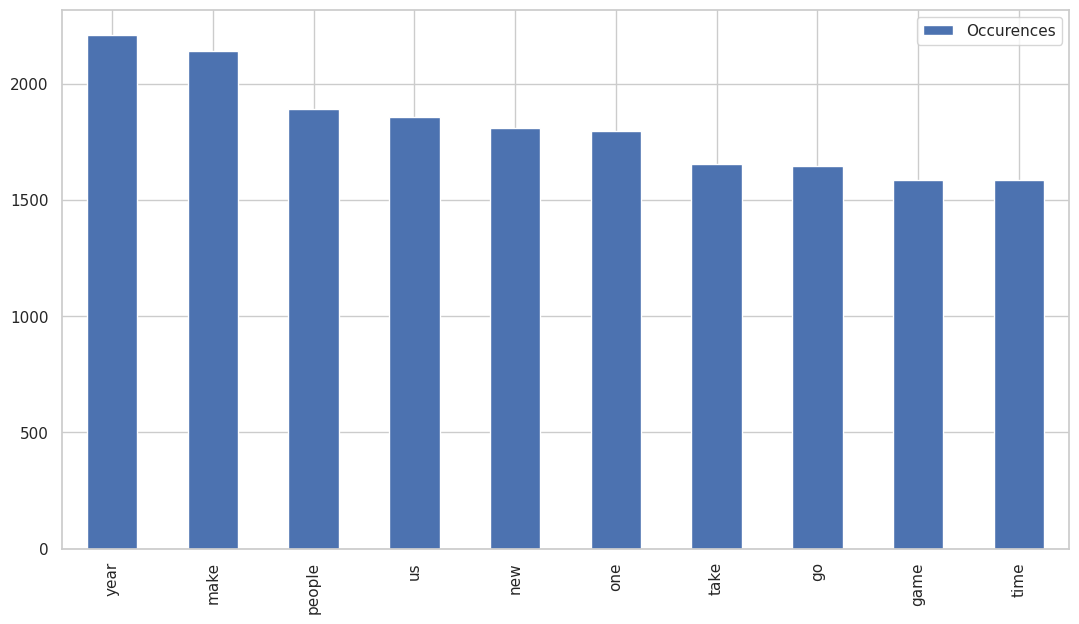

In [61]:
top_words.plot(kind = 'bar', figsize = (13,7))

In [62]:
print(f'Number of features after vectorization = {n_features}')
print(f'\nAfter Text Pre-processing, {round((n_features_raw - n_features)*100/n_features_raw, 2)}% of contextually insignificant features have been removed')

Number of features after vectorization = 1436

After Text Pre-processing, 94.79% of contextually insignificant features have been removed


**It can be observed that the number of features has reduced by a great number due to the addition of the keyword arguments max_df and min_df. Now, the number of documents is greater in number than the number of features, we may proceed with model building.**

##### Which text vectorization technique have you used and why?

Count Vectorization is chosen for text vectorization because LDA, as a word generating algorithm in topic modeling, relies on term counts to generate words from a multinomial distribution. Count Vectorization represents text data by counting the occurrences of each term in a document, which aligns well with the nature of LDA's word generation process. Therefore, using Count Vectorization is a suitable choice when applying LDA for topic modeling tasks.

### 4. Feature Manipulation & Selection

Feature manipulation and selection techniques are not strictly necessary in topic modeling. If the dataset is manageable, the topics are satisfactory, and there is minimal noise or domain-specific challenges, these techniques may not be required. It depends on the specific goals, dataset characteristics, and available resources to determine whether feature manipulation and selection are necessary.

## ***7. ML Model Implementation***

### ML Model - 1  Latent Dirichlet Allocation

In [63]:
# Instantiate the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit the LDA model on the tokenized data
lda_model.fit(tokenised_data)

LatentDirichletAllocation(random_state=42)

In [64]:
# Predict topic probabilities for the tokenized data
topic_probabilities = lda_model.transform(tokenised_data)

# Print the predicted topic probabilities
print(topic_probabilities)

[[9.90369800e-04 9.90307300e-04 6.95885208e-01 ... 9.90340506e-04
  9.90355719e-04 9.90379666e-04]
 [5.26493122e-02 5.84877084e-04 3.06824942e-02 ... 5.85244829e-04
  1.11796479e-01 5.84897068e-04]
 [5.81540388e-04 5.81565339e-04 5.81511094e-04 ... 5.81645698e-04
  5.81505184e-04 5.81573596e-04]
 ...
 [2.35112276e-02 5.71564250e-04 2.73072741e-02 ... 5.71537502e-04
  7.07188423e-01 5.71530205e-04]
 [6.13656856e-04 6.13693576e-04 6.13671199e-04 ... 6.13613069e-04
  9.42467759e-01 6.13630913e-04]
 [9.26164984e-04 9.26193990e-04 9.26293924e-04 ... 9.26224801e-04
  8.91291198e-01 4.89879240e-02]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Define the parameter settings
n_components = list(range(5, 10))  # Number of topics

# Initialize a list to store perplexity scores
perplexity_scores = []

# Calculate the perplexity score for each number of topics
for n in n_components:
    # Instantiate the LDA model with the current number of topics
    lda_model = LatentDirichletAllocation(n_components=n, random_state=42)

    # Fit the LDA model on the tokenized data
    lda_model.fit(tokenised_data)

    # Calculate the perplexity score
    perplexity_score = lda_model.perplexity(tokenised_data)

    # Append the perplexity score to the list
    perplexity_scores.append(perplexity_score)

# Print the perplexity scores
for n, score in zip(n_components, perplexity_scores):
    print(f"Number of topics: {n} | Perplexity Score: {score}")

Number of topics: 5 | Perplexity Score: 743.0567842013797
Number of topics: 6 | Perplexity Score: 730.2775229152063
Number of topics: 7 | Perplexity Score: 724.4109240815998
Number of topics: 8 | Perplexity Score: 722.9226291443601
Number of topics: 9 | Perplexity Score: 721.9197103839634


#### 2. Cross- Validation & Hyperparameter Tuning

In [66]:
# Fitting an LDA model with Hyperparameter tuning on the tokenised_data
%%time
lda = LatentDirichletAllocation(random_state = 42)
grid_params = {'n_components' : list(range(5,10))}                 # Number of topics in range of [5,10)
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(tokenised_data)

CPU times: user 5min 33s, sys: 2.36 s, total: 5min 36s
Wall time: 5min 50s


GridSearchCV(estimator=LatentDirichletAllocation(random_state=42),
             param_grid={'n_components': [5, 6, 7, 8, 9]})

In [67]:
# Best parameters
best_lda_model = lda_model.best_estimator_
log_likelihood_m1 = lda_model.best_score_
perplexity_m1 = best_lda_model.perplexity(tokenised_data)
print("Parameters of Best LDA Model" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model", log_likelihood_m1)
print("Perplixity Score on the LDA model", perplexity_m1)

Parameters of Best LDA Model {'n_components': 5}
Best log likelihood Score for the LDA model -441587.0754078079
Perplixity Score on the LDA model 743.0567842013797


##### Which hyperparameter optimization technique have you used and why?

- Algorithms like GridSearch and RandomSearch were introduced to automate the process of running the model on various desired combinations of components that the user wishes to optimise, instead of manually running through every combination which is not only time consuming, but also requires regular involvement of the user.

- RandomSearch is a method which tries out random combinations of the hyperparameter values to be tuned, unlike GridSearchCV which runs through all the possible combinations.

In this case, GridSearchCV is sufficient as the computational time is not very high (~5-10 minutes at the maximum), and there is only one hyperparameter which is being tuned.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In terms of perplexity scores, there is no improvement after hyperparameter tuning. The perplexity score remains the same at 743.0567842013797 for the best LDA model with 5 topics. However, it's worth noting that the hyperparameter tuning has helped identify the optimal number of topics, which is determined to be 5 based on the best log likelihood score.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Assigning the Topic labels to each document**

In [68]:
# Probability of document's belonging to each of the five topics
lda_model.transform(tokenised_data[0])

array([[0.00208704, 0.70830583, 0.01309803, 0.27446903, 0.00204007]])

- For a particular document, the probability of it belonging to each of the five topics is obtained after using the LDA model.

- The (index+1) is used as the model label temporarily. For eg, the topic assigned for the above document will be 2, since it has the maximum probability

In [69]:
# Functio for assigning topics
def assign_topics(data, tokenised, model):
  ''' Assigns topics for each document based on highest probability of a topic for each document.
      Returns the input dataframe with the additional column of Topics assigned through the model.
      Inputs include the pre-processed data, tokenised data and the model itself'''

  # Array of probabilites for each topic for each document. Shape - (n_documents, n_topics)
  topic_dist = model.transform(tokenised)

  topics = []
  # Assigns (index+1) of the topic with maximum probability as the topic name for the particular document
  for doc in topic_dist:
    topics.append(np.argmax(np.abs(doc))+1)

  # Convert to a Dataframe and merge with the original pre-processed dataframe with documents as an additional column
  topics_df = pd.DataFrame(topics).rename(columns = {0:'Topic_LDA'})
  return pd.merge(data, topics_df, left_index = True, right_index = True)

In [70]:
result_df = assign_topics(data, tokenised_data, best_lda_model)
result_df.head(2)

Title  \
0  Yukos unit buyer faces loan claim   
1  Ad sales boost Time Warner profit   

                                         Description  Category  length  \
0  owners embattle russian oil giant yukos ask bu...  Business    1514   
1  quarterly profit us media giant timewarner jum...  Business    2520   

   word_count  Topic_LDA  
0         259          2  
1         416          2

**Comparison of Topics obtained through LDA with input Categories**

In [71]:
# Comparison of Topics obtained through LDA with input Categories
result_df.groupby(['Category', 'Topic_LDA'])['Title'].count()

Category       Topic_LDA
Business       2            424
               3             13
               4             65
               5              1
Entertainment  1            341
               2              3
               3              8
               4             15
               5              2
Politics       1              1
               3              4
               4            397
               5              1
Sport          1              2
               2              3
               4              3
               5            495
Tech           1             10
               2              4
               3            313
               4              8
               5             12
Name: Title, dtype: int64

- It can be observed above that for each of the Categories, the implemented LDA model predicted with high precision.

- For example, for articles originally tagged 'Business', the LDA model has predicted 430 of 503 correctly, labeled as 2.

- This result is used to map the input Topics and LDA topics one-to-one. In the above case, 2 as Business and so on

In [72]:
def convert_labels(result):
  '''Converts the integer labels to Category names'''

  to_map = result.groupby(['Category', 'Topic_LDA'], as_index=False)['Title'].count()

  # Converts the groupby dataframe to a Dataframe with first column as input category and second as the label through LDA to be mapped
  to_map = to_map.groupby('Category', as_index=False).apply(lambda x: x['Topic_LDA'][x['Title'].idxmax()]).rename(columns = str).rename(columns = {'None':'LDA'})

  # Mapping and updating the TOpic_LDA column
  to_map_dict = dict(zip(to_map['LDA'], to_map['Category']))
  result['Topic_LDA'] = result['Topic_LDA'].map(to_map_dict)
  for category in to_map_dict:
    print(f'{category} is mapped to {to_map_dict[category]}')
  return result

In [73]:
result_df = convert_labels(result_df)

2 is mapped to Business
1 is mapped to Entertainment
4 is mapped to Politics
5 is mapped to Sport
3 is mapped to Tech


In [74]:
result_df.head(2)

Title  \
0  Yukos unit buyer faces loan claim   
1  Ad sales boost Time Warner profit   

                                         Description  Category  length  \
0  owners embattle russian oil giant yukos ask bu...  Business    1514   
1  quarterly profit us media giant timewarner jum...  Business    2520   

   word_count Topic_LDA  
0         259  Business  
1         416  Business

In [75]:
result_df['Topic_LDA'].unique()

array(['Business', 'Politics', 'Tech', 'Sport', 'Entertainment'],
      dtype=object)

**Computing the Model Accuracy and individual Topic Precisions, Recalls, and F1 Scores**

In [76]:
# Plotting the count of Articles categorised by each category and comparing with input Categories
def aggregate_plot(result_df):
  '''Plots the number of articles categorised in each category by the LDA
  and compared with the original categorisation provided as input'''
  aggregated_input = pd.DataFrame(result_df['Category'].value_counts())
  aggregated_LDA = pd.DataFrame(result_df['Topic_LDA'].value_counts())
  aggregated = pd.merge(aggregated_input, aggregated_LDA, left_index=True, right_index=True)
  aggregated.plot(kind='bar', figsize=(13,7))
  plt.show()

# Computing the model accuracy
def model_accuracy(result):
  '''Computes the model accuracy, defined as the number of articles
  correctly categorised to the total number of articles'''

  df1 = result.groupby(['Category', 'Topic_LDA'], as_index=False)['Title'].count().rename(columns = {'Title':'Count'})

  # Articles correctly categorised in the topic
  correct_preds = df1[df1['Category'] == df1['Topic_LDA']]['Count'].reset_index()['Count'].sum()

  total_accuracy = correct_preds/result.shape[0]
  return total_accuracy * 100

# Computing the precision, recall and F1 scores for each topic modeled by the LDA model
def topic_precision(dfp):
  '''Defined as the number of articles correctly categorised to the total articles in the topic through LDA'''

  # Total articles present in each topic through LDA (TP + FP)
  predicted_articles_total = dfp.groupby('Topic_LDA')['Count'].sum().reset_index()

  # Articles correctly categorised in each topic (TP)
  predicted_articles = dfp[dfp['Category'] == dfp['Topic_LDA']]['Count'].reset_index()['Count']

  # Calculating the precision
  predicted_articles_total['Count'] = (predicted_articles/predicted_articles_total['Count'])*100
  return predicted_articles_total.rename(columns = {'Count':'Precision', 'Topic_LDA':'Topic'})

def topic_recall(dfr):
  '''Defined as the number of articles correctly categorised to the total articles originally in the topic'''

  # Total articles present in each topic through LDA (TP + FN)
  predicted_articles_total = dfr.groupby('Category')['Count'].sum().reset_index()

  # Articles correctly categorised in each topic (TP)
  predicted_articles = dfr[dfr['Category'] == dfr['Topic_LDA']]['Count'].reset_index()['Count']

  # Calculating the Recall
  predicted_articles_total['Count'] = (predicted_articles/predicted_articles_total['Count'])*100
  return predicted_articles_total.rename(columns = {'Count':'Recall', 'Category':'Topic'})

def precision_recall_f1(result):
  ''' Gives the precision, recall, and F1 score for each category'''

  df1 = result.groupby(['Category', 'Topic_LDA'], as_index=False)['Title'].count().rename(columns = {'Title':'Count'})

  # Calculating precision and adding a column
  precisions = topic_precision(df1)

  # Calculating recall and adding a column
  recalls = topic_recall(df1)

  # Merging and Calculating F1 Score
  prf1 = pd.merge(recalls, precisions, on = 'Topic')
  prf1['F1_Score'] = (2*prf1['Precision']*prf1['Recall'])/(prf1['Precision'] + prf1['Recall'])
  return prf1


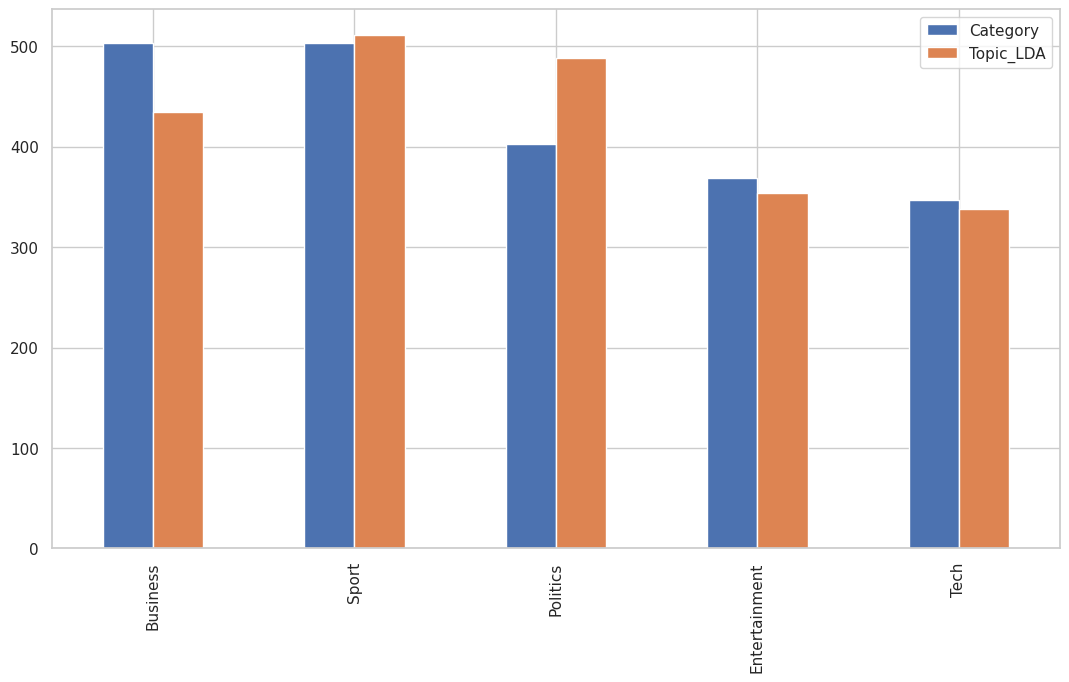

In [77]:
# Comparison plot
aggregate_plot(result_df)

In [78]:
print(f'The LDA model has an accuracy of {round(model_accuracy(result_df),2)}%')

The LDA model has an accuracy of 92.71%


In [79]:
# Metric Table for each topic
prf1_m1 = precision_recall_f1(result_df)
prf1_m1

Topic     Recall  Precision   F1_Score
0       Business  84.294235  97.695853  90.501601
1  Entertainment  92.411924  96.327684  94.329184
2       Politics  98.511166  81.352459  89.113356
3          Sport  98.409543  96.868885  97.633136
4           Tech  90.201729  92.603550  91.386861

**Topic-wise analysis - Term distributions for each Topic**

In [80]:
def top_n_terms(vectorizer, model, n_top_words):
  '''Takes the vectorizer, model and the required number of most frequent words
  as input and returns a list of length (number of topics), each element being a
  dictionary of the word and its frequency of occurence in the particular topic'''

  # List of all words vectorized
  words = vectorizer.get_feature_names_out()

  # List of 5 dictionaries
  top_words_topic = []
  for topic, weights in enumerate(model.components_):
    word_weights = dict()

    # Indices of top n words
    indices = np.argsort(weights)[::-1][:n_top_words]

    # Top n words and their weights
    top_words = words[indices]
    top_weights = weights[indices]

    for i in range(len(words[indices])):
      word_weights[top_words[i]] = top_weights[i]
    top_words_topic.append(word_weights)
  return top_words_topic

def plot_wordcloud(topic_term_freq):
  '''Plots a word cloud, sizing proportional to frequency of the word in the topic'''

  colours = ['black', 'darkslateblue', 'darkolivegreen', 'khaki']
  wordcloud = WordCloud(width = 1300, height = 800,
                  background_color = random.choice(colours),
                  min_font_size = 10).generate(' '.join(list(topic_term_freq.keys())))
  wordcloud = wordcloud.generate_from_frequencies(frequencies = topic_term_freq)
  plt.figure(figsize = (13,8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()


In [81]:
# Getting the top 100 words for each topic
top_words = top_n_terms(tokeniser, best_lda_model, 100)
print(top_words[0])

{'film': 1063.1934936038026, 'best': 652.5451206983987, 'award': 595.23541360568, 'music': 508.7052397256176, 'show': 495.6738897144769, 'year': 479.28879807119165, 'star': 440.1532366111577, 'one': 378.58105305113673, 'include': 373.70961542098115, 'us': 325.30792628855187, 'new': 314.74671497875624, 'make': 313.8791236935551, 'take': 299.8402818756698, 'top': 272.0545993890356, 'first': 269.03939655340713, 'go': 245.3948508150576, 'band': 238.79252937970836, 'uk': 237.24991615872815, 'record': 233.15053348436226, 'years': 229.68521060640367, 'tv': 229.39562386676505, 'last': 225.55146432985404, 'release': 223.01378609121005, 'play': 221.74119260676093, 'two': 217.0583118934645, 'british': 216.77313158428387, 'director': 214.79055148213672, 'number': 212.40105812019235, 'time': 199.64661610756545, 'actor': 194.19759708266136, 'bbc': 187.75731114013865, 'album': 175.19879798510692, 'song': 174.19539204304417, 'prize': 173.33091621198318, 'chart': 172.19554777525076, 'three': 168.578963

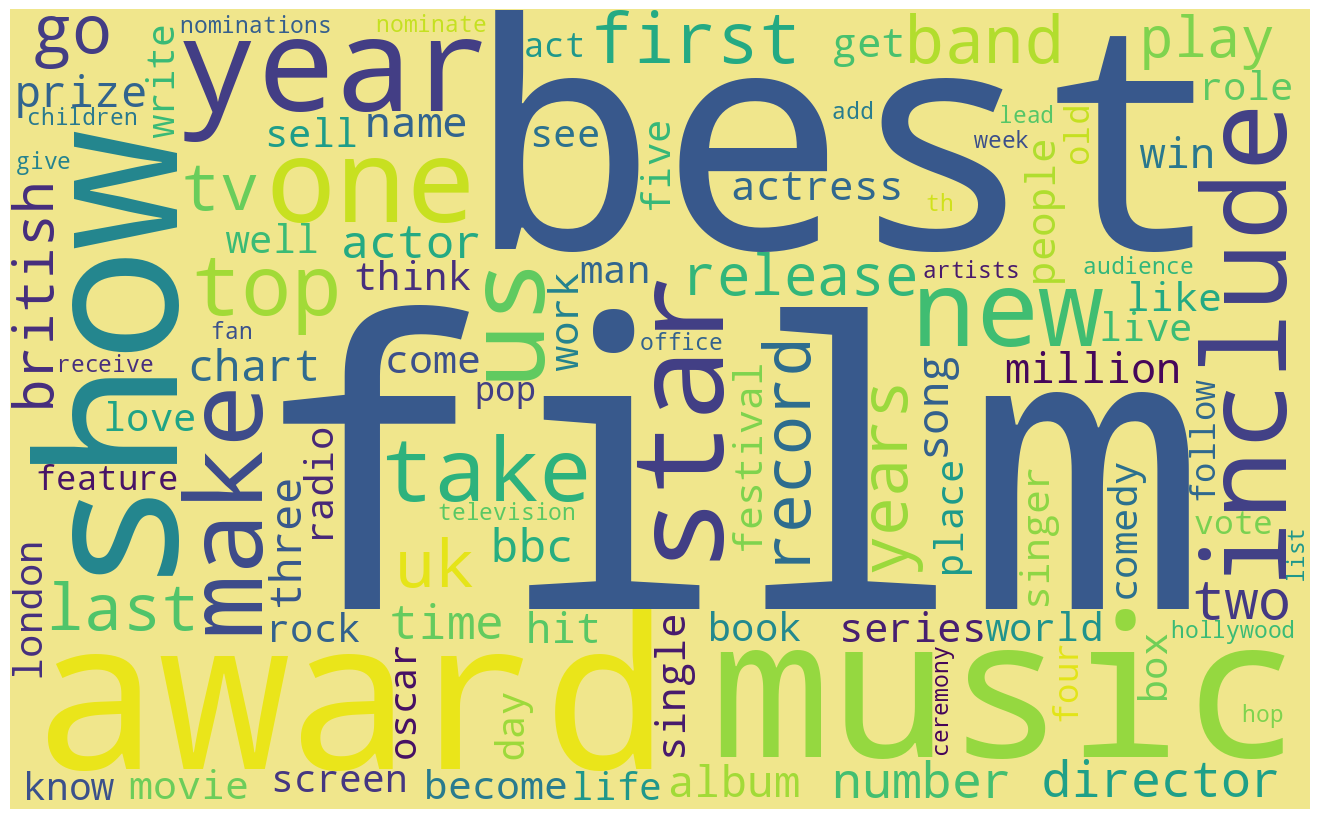

In [82]:
plot_wordcloud(top_words[0])

*Looking at the word distributions, it can be concluded that this is the Entertainment Topic*

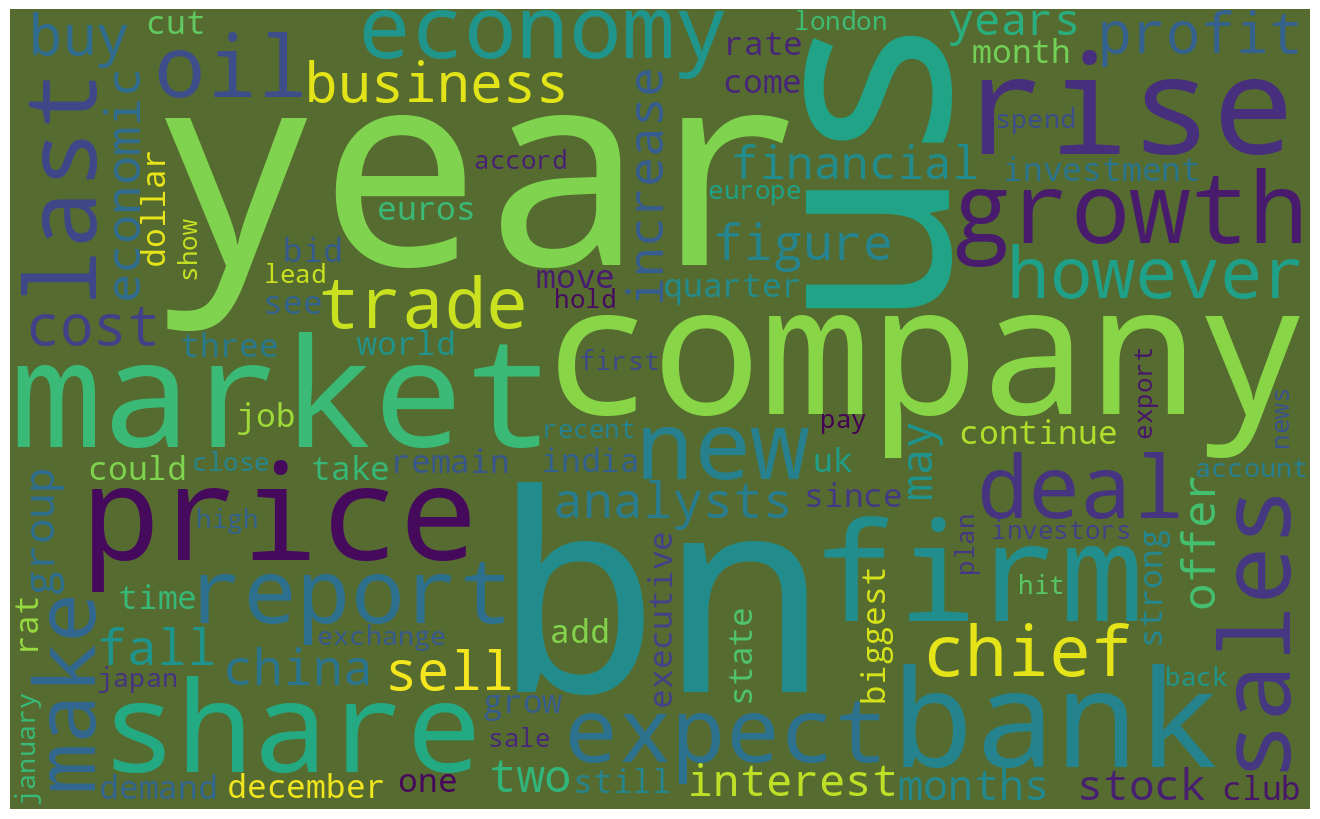

In [83]:
plot_wordcloud(top_words[1])

*Looking at the word distributions, it can be concluded that this is the Business Topic*

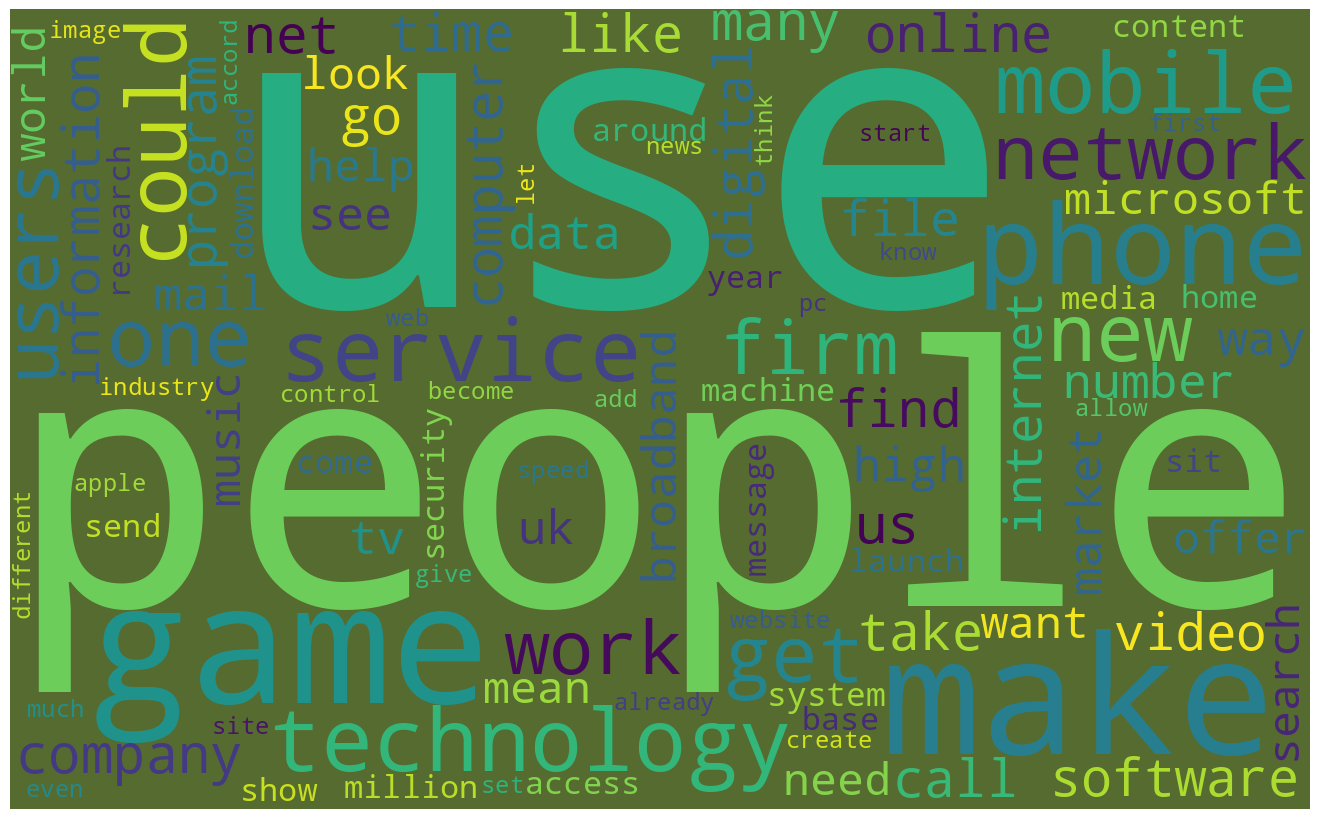

In [84]:
plot_wordcloud(top_words[2])

*Looking at the word distributions, it can be concluded that this is the Tech Topic*

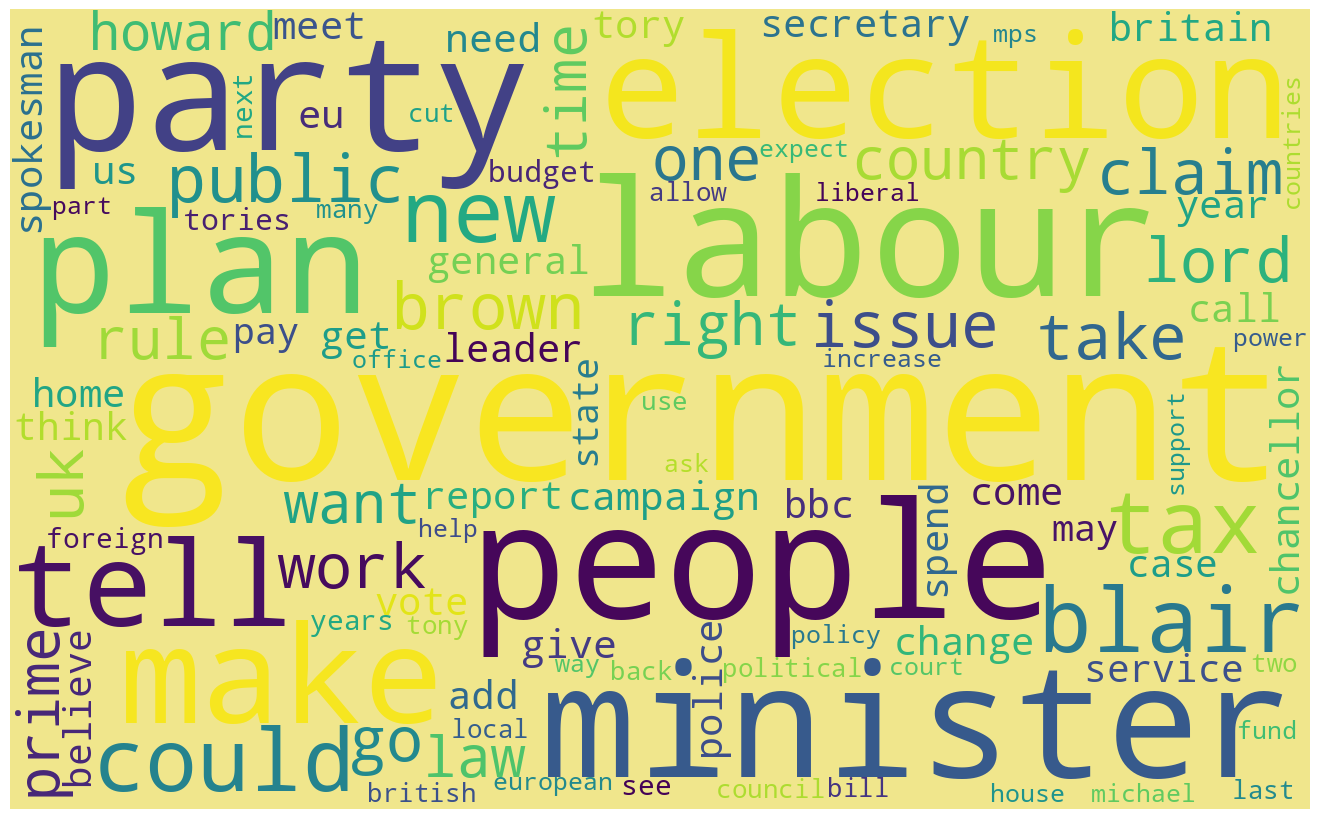

In [85]:
plot_wordcloud(top_words[3])

*Looking at the word distributions, it can be concluded that this is the Politics Topic*

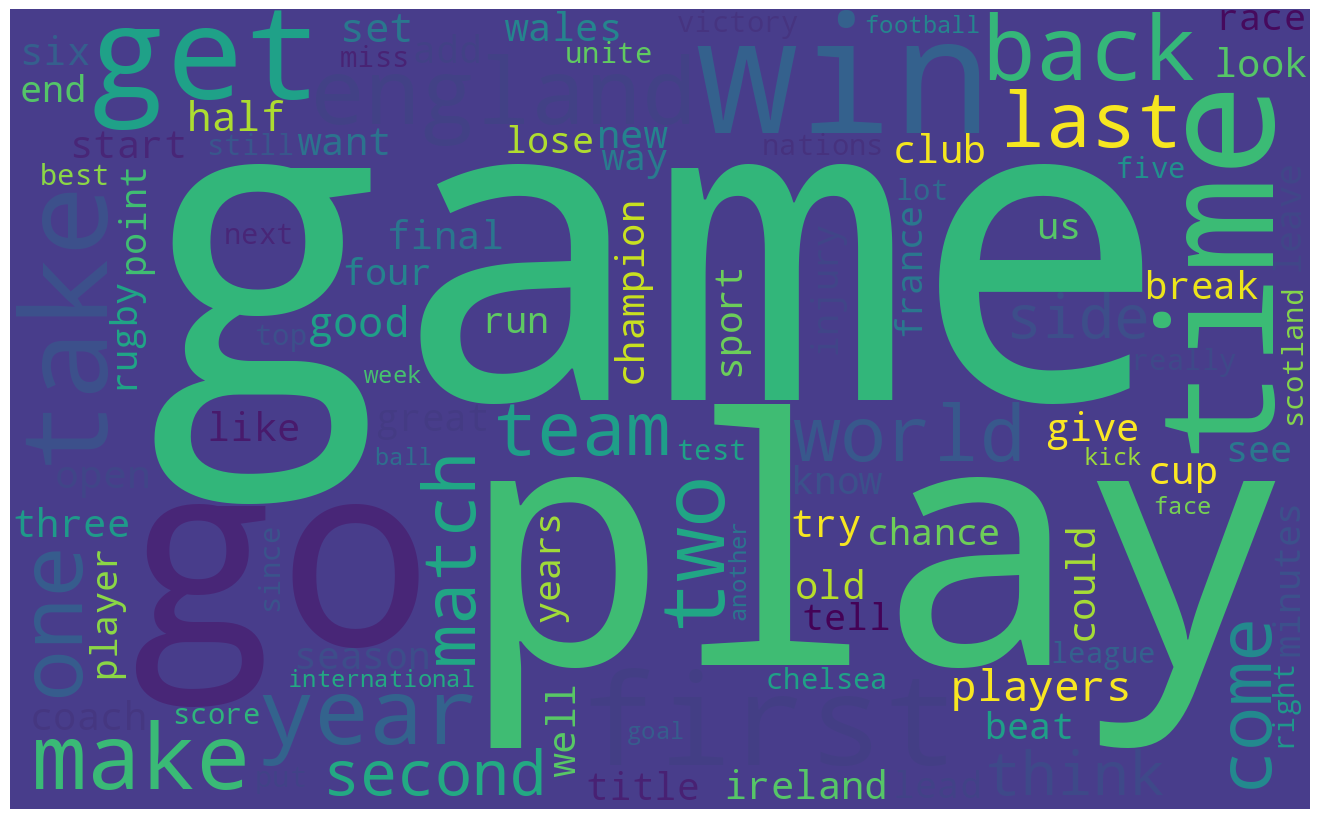

In [86]:
plot_wordcloud(top_words[4])

*Looking at the word distributions, it can be concluded that this is the Sport Topic*

### ML Model - 2  Latent Dirichlet Allocation with TFIDF Vectorizer

In [87]:
%%time
# Vectorizing using the TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 0.1)
tfidf_vectorized = tfidf_vectorizer.fit_transform(data['Description'])

CPU times: user 388 ms, sys: 0 ns, total: 388 ms
Wall time: 420 ms


In [88]:
print(f'The number of features/tokens after TFIDF Vectorizer is {len(tfidf_vectorizer.get_feature_names_out())}\n')

The number of features/tokens after TFIDF Vectorizer is 244



In [89]:
# Instantiate the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=15)

# Fit the LDA model on the tokenized data
lda_model.fit(tfidf_vectorized)

LatentDirichletAllocation(random_state=15)

In [90]:
# Predict topic probabilities for the tokenized data
topic_probabilities = lda_model.transform(tfidf_vectorized)

# Print the predicted topic probabilities
print(topic_probabilities)

[[0.01590988 0.01591022 0.01590702 ... 0.85681062 0.01590953 0.01590999]
 [0.0135839  0.01358886 0.01357834 ... 0.55095044 0.34039245 0.0135823 ]
 [0.01327042 0.01327067 0.01326753 ... 0.0132728  0.88056398 0.01327306]
 ...
 [0.01437023 0.01437132 0.01436718 ... 0.87066799 0.01437371 0.01437027]
 [0.0139624  0.01396127 0.01395688 ... 0.87436281 0.01396021 0.01395996]
 [0.01677833 0.01677829 0.01677445 ... 0.84895749 0.01678229 0.0168099 ]]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# Visualizing evaluation Metric Score chart
# Define the parameter settings
n_components = list(range(5, 10))  # Number of topics

# Initialize a list to store perplexity scores
perplexity_scores = []

# Calculate the perplexity score for each number of topics
for n in n_components:
    # Instantiate the LDA model with the current number of topics
    lda_model = LatentDirichletAllocation(n_components=n, random_state=15)

    # Fit the LDA model on the tokenized data
    lda_model.fit(tfidf_vectorized)

    # Calculate the perplexity score
    perplexity_score = lda_model.perplexity(tfidf_vectorized)

    # Append the perplexity score to the list
    perplexity_scores.append(perplexity_score)

# Print the perplexity scores
for n, score in zip(n_components, perplexity_scores):
    print(f"Number of topics: {n} | Perplexity Score: {score}")

Number of topics: 5 | Perplexity Score: 386.9878030848297
Number of topics: 6 | Perplexity Score: 418.0248787472084
Number of topics: 7 | Perplexity Score: 438.1809025656313
Number of topics: 8 | Perplexity Score: 464.9519947395354
Number of topics: 9 | Perplexity Score: 479.74787980241564


#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# Fitting the LDA model on the TFIDF-vectorized data
lda = LatentDirichletAllocation(random_state = 15)
grid_params = {'n_components' : list(range(5,10))}
lda_model_2 = GridSearchCV(lda, param_grid = grid_params)
lda_model_2.fit(tfidf_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(random_state=15),
             param_grid={'n_components': [5, 6, 7, 8, 9]})

In [93]:
# Printing the characteristics of the best model by TFIDF vectorization
best_lda_model_tfidf = lda_model_2.best_estimator_
log_likelihood_m2 = lda_model_2.best_score_
perplexity_m2 = best_lda_model_tfidf.perplexity(tfidf_vectorized)
print("Parameters of Best LDA Model" , lda_model_2.best_params_)
print("Best log likelihood Score for the LDA model", log_likelihood_m2)
print("Perplexity of LDA model with TfidfVectorizer on data", perplexity_m2)

Parameters of Best LDA Model {'n_components': 5}
Best log likelihood Score for the LDA model -15266.990851227729
Perplexity of LDA model with TfidfVectorizer on data 386.9878030848297


In [94]:
# Probability of document's belonging to each of the five topics
lda_model_2.transform(tfidf_vectorized[0])

array([[0.03265766, 0.03270277, 0.03265708, 0.86879222, 0.03319028]])

##### Which hyperparameter optimization technique have you used and why?

- Algorithms like GridSearch and RandomSearch were introduced to automate the process of running the model on various desired combinations of components that the user wishes to optimise, instead of manually running through every combination which is not only time consuming, but also requires regular involvement of the user.

- RandomSearch is a method which tries out random combinations of the hyperparameter values to be tuned, unlike GridSearchCV which runs through all the possible combinations.

In this case, GridSearchCV is sufficient as the computational time is not very high (~5-10 minutes at the maximum), and there is only one hyperparameter which is being tuned.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


The initial evaluation of the LDA model without hyperparameter tuning resulted in perplexity scores of 2102.04, 2266.43, 2481.78, 2616.96, and 2680.59 for 5, 6, 7, 8, and 9 topics respectively.

After conducting hyperparameter tuning, the best LDA model was identified with 5 topics. The corresponding parameters for this model were {'n_components': 5}. The log likelihood score for the best model was -30404.01, and the perplexity score improved to 2143.78. This improvement indicates that the tuned LDA model with TF-IDF vectorization performed better than the initial model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Assigning the Topic names to each document**

In [95]:
# Assigning the topics for each document based on maximum probability
result_df_tfidf = assign_topics(data, tfidf_vectorized, best_lda_model_tfidf)
result_df_tfidf

Title  \
0     Yukos unit buyer faces loan claim   
1     Ad sales boost Time Warner profit   
2      Dollar gains on Greenspan speech   
3      US trade gap hits record in 2004   
4     High fuel prices hit BA's profits   
...                                 ...   
2120    Net fingerprints combat attacks   
2121   BT program to beat dialler scams   
2122    Bad e-mail habits sustains spam   
2123  Microsoft plans 'safer ID' system   
2124   Beckham virus spotted on the net   

                                            Description  Category  length  \
0     owners embattle russian oil giant yukos ask bu...  Business    1514   
1     quarterly profit us media giant timewarner jum...  Business    2520   
2     dollar hit highest level euro almost three mon...  Business    2216   
3     gap us export import hit time high bn bn lates...  Business    1915   
4     british airways blame high fuel price drop pro...  Business    2362   
...                                                 ...       ...     ...   
2120  eighty large net service firm switch software ...      Tech    2755   
2121  bt introduce two initiatives help beat rogue d...      Tech    2481   
2122  bad behaviour e mail users help sustain spam i...      Tech    2813   
2123  microsoft plan make windows internet explorer ...      Tech    2281   
2124  virus writers trade interest david beckham dis...      Tech    1847   

      word_count  Topic_LDA  
0            259          4  
1            416          4  
2            380          4  
3            322          4  
4            401          4  
...          ...        ...  
2120         452          2  
2121         415          2  
2122         472          2  
2123         365          2  
2124         311          2  

[2125 rows x 6 columns]

In [96]:
result_df_tfidf['Topic_LDA'].unique()

array([4, 5, 2, 1, 3])

**Comparison of Topics obtained through LDA with input Categories**

In [97]:
# Comparison of Topics obtained through LDA with input Categories
result_df_tfidf.groupby(['Category', 'Topic_LDA'], as_index=True)['Title'].count()

Category       Topic_LDA
Business       1              1
               2             15
               4            445
               5             42
Entertainment  1            274
               2             31
               3             27
               4             18
               5             19
Politics       1              1
               2              6
               3              6
               4             10
               5            380
Sport          1              6
               2              4
               3            456
               4              4
               5             33
Tech           1              7
               2            299
               3             12
               4             10
               5             19
Name: Title, dtype: int64

In [98]:
# Converting the label names
result_df_tfidf = convert_labels(result_df_tfidf)

4 is mapped to Business
1 is mapped to Entertainment
5 is mapped to Politics
3 is mapped to Sport
2 is mapped to Tech


In [99]:
result_df_tfidf

Title  \
0     Yukos unit buyer faces loan claim   
1     Ad sales boost Time Warner profit   
2      Dollar gains on Greenspan speech   
3      US trade gap hits record in 2004   
4     High fuel prices hit BA's profits   
...                                 ...   
2120    Net fingerprints combat attacks   
2121   BT program to beat dialler scams   
2122    Bad e-mail habits sustains spam   
2123  Microsoft plans 'safer ID' system   
2124   Beckham virus spotted on the net   

                                            Description  Category  length  \
0     owners embattle russian oil giant yukos ask bu...  Business    1514   
1     quarterly profit us media giant timewarner jum...  Business    2520   
2     dollar hit highest level euro almost three mon...  Business    2216   
3     gap us export import hit time high bn bn lates...  Business    1915   
4     british airways blame high fuel price drop pro...  Business    2362   
...                                                 ...       ...     ...   
2120  eighty large net service firm switch software ...      Tech    2755   
2121  bt introduce two initiatives help beat rogue d...      Tech    2481   
2122  bad behaviour e mail users help sustain spam i...      Tech    2813   
2123  microsoft plan make windows internet explorer ...      Tech    2281   
2124  virus writers trade interest david beckham dis...      Tech    1847   

      word_count Topic_LDA  
0            259  Business  
1            416  Business  
2            380  Business  
3            322  Business  
4            401  Business  
...          ...       ...  
2120         452      Tech  
2121         415      Tech  
2122         472      Tech  
2123         365      Tech  
2124         311      Tech  

[2125 rows x 6 columns]

**Computing the Model Accuracy and individual Topic Precisions, Recalls, and F1 Scores**

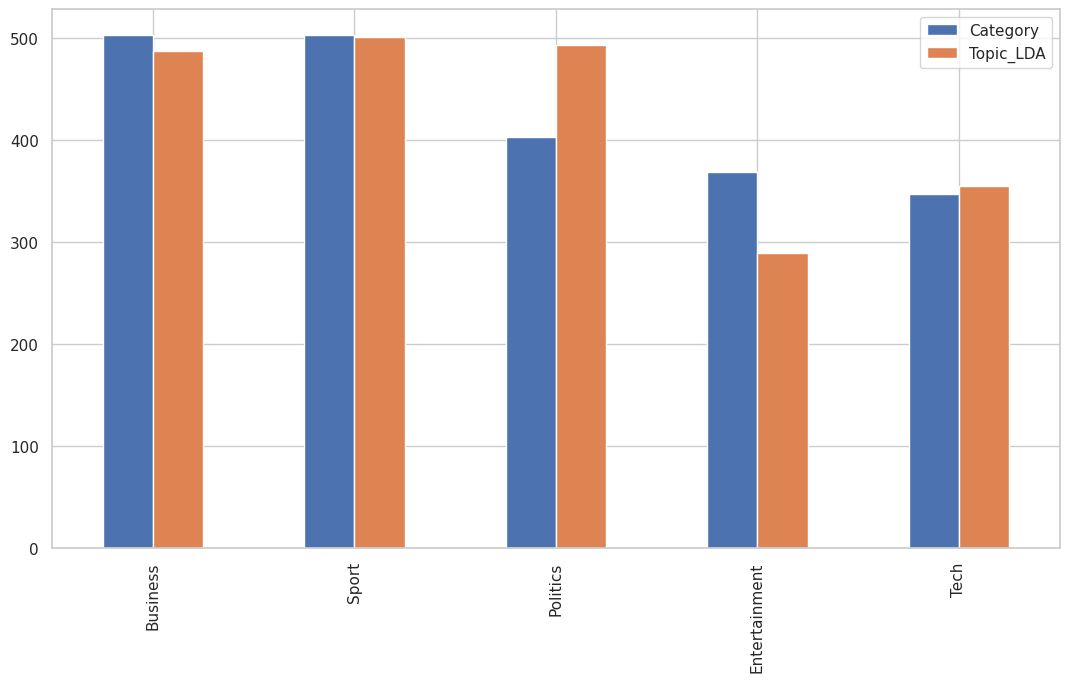

In [100]:
aggregate_plot(result_df_tfidf)

In [101]:
print(f'The LDA model has an accuracy of {round(model_accuracy(result_df_tfidf),2)}%')

The LDA model has an accuracy of 87.25%


In [102]:
prf1_m2 = precision_recall_f1(result_df_tfidf)
prf1_m2

Topic     Recall  Precision   F1_Score
0       Business  88.469185  91.375770  89.898990
1  Entertainment  74.254743  94.809689  83.282675
2       Politics  94.292804  77.079108  84.821429
3          Sport  90.656064  91.017964  90.836653
4           Tech  86.167147  84.225352  85.185185

*It can be observed that implementation of the LDA model using Tfidf Vectorizer lowered the model accuracy. The model tended to over-determine the Entertainment Topic, hence the lower score of F1*

**Topic-wise analysis - Term distributions for each Topic**

In [103]:
top_words_tfidf = top_n_terms(tfidf_vectorizer, best_lda_model_tfidf, 100)
top_words_tfidf

[{'film': 89.4177065287536,
  'star': 45.82763670995562,
  'best': 44.048323909558924,
  'show': 29.00968788799672,
  'include': 26.2761427786892,
  'year': 22.752332469963516,
  'top': 19.282617329411806,
  'us': 18.469810873483567,
  'release': 18.469582213525424,
  'director': 17.65367118829596,
  'one': 17.006348338736235,
  'record': 16.436324176783778,
  'number': 15.409364112805735,
  'take': 15.401485184660284,
  'new': 15.22197744614979,
  'play': 14.655206651038961,
  'first': 14.614709868162608,
  'british': 14.611217360604762,
  'uk': 13.454696632307474,
  'hit': 12.906364067874417,
  'name': 12.43056082322409,
  'london': 12.318248335772974,
  'make': 11.857096458631313,
  'years': 11.803795162996938,
  'two': 11.796849460747351,
  'go': 11.51711986553458,
  'bbc': 11.439783945263729,
  'million': 11.156371870154011,
  'last': 11.132033881714753,
  'place': 10.923785297664837,
  'day': 10.62581575715643,
  'three': 10.553425152591684,
  'time': 10.542737848786219,
  'follo

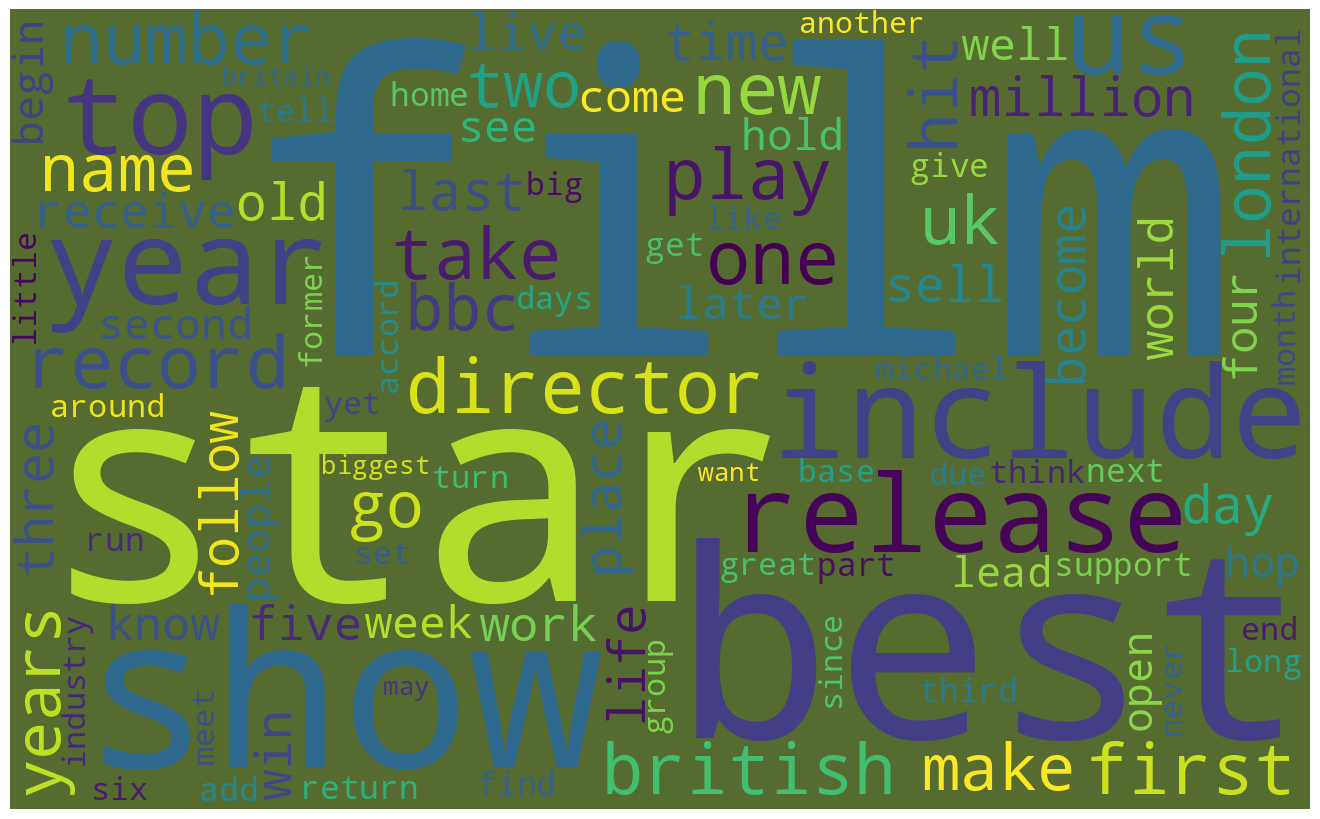

In [104]:
plot_wordcloud(top_words_tfidf[0])

*Looking at the word distributions, it can be concluded that this is the Entertenment Topic*

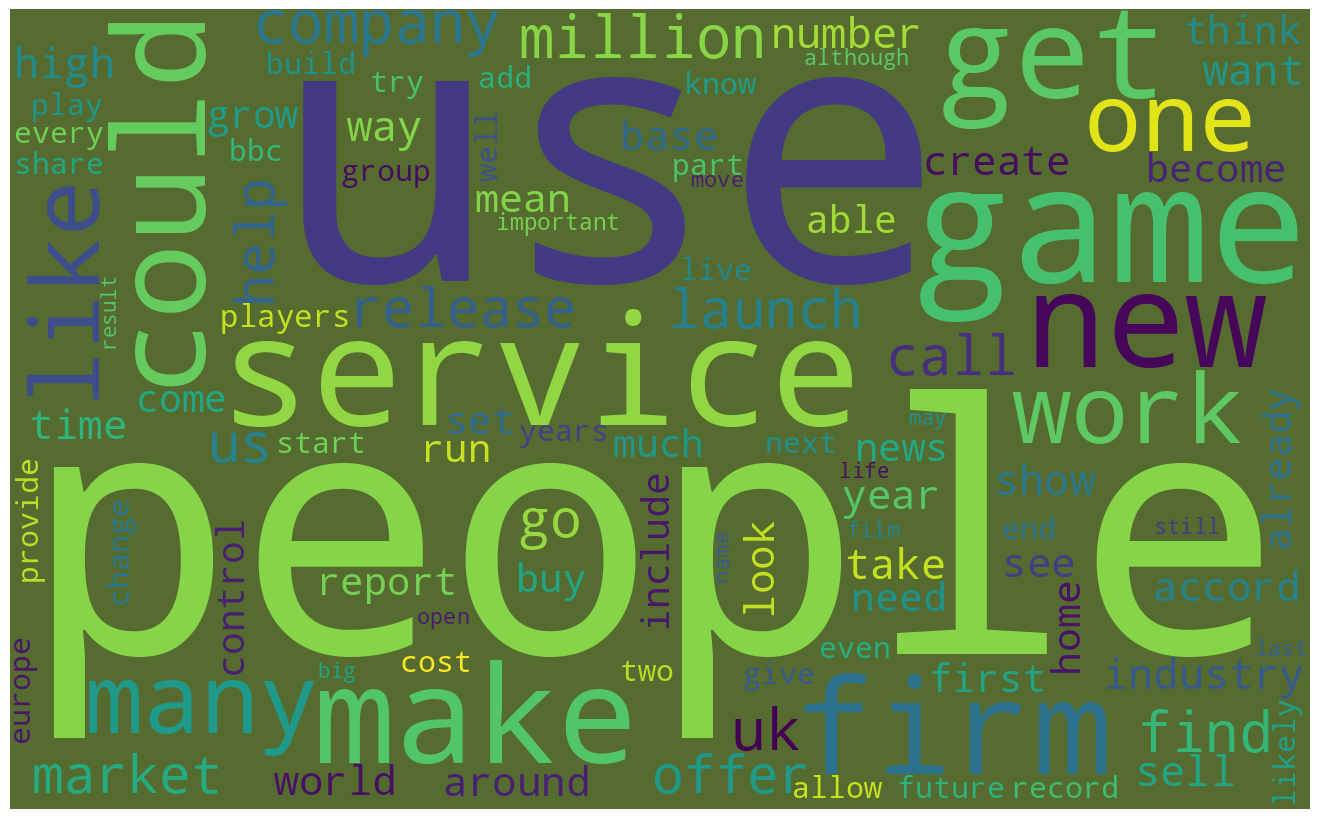

In [105]:
plot_wordcloud(top_words_tfidf[1])

*Looking at the word distributions, it can be concluded that this is the Tech Topic*

In [106]:
plot_wordcloud(top_words_tfidf[2])

*Looking at the word distributions, it can be concluded that this is the Sports Topic*

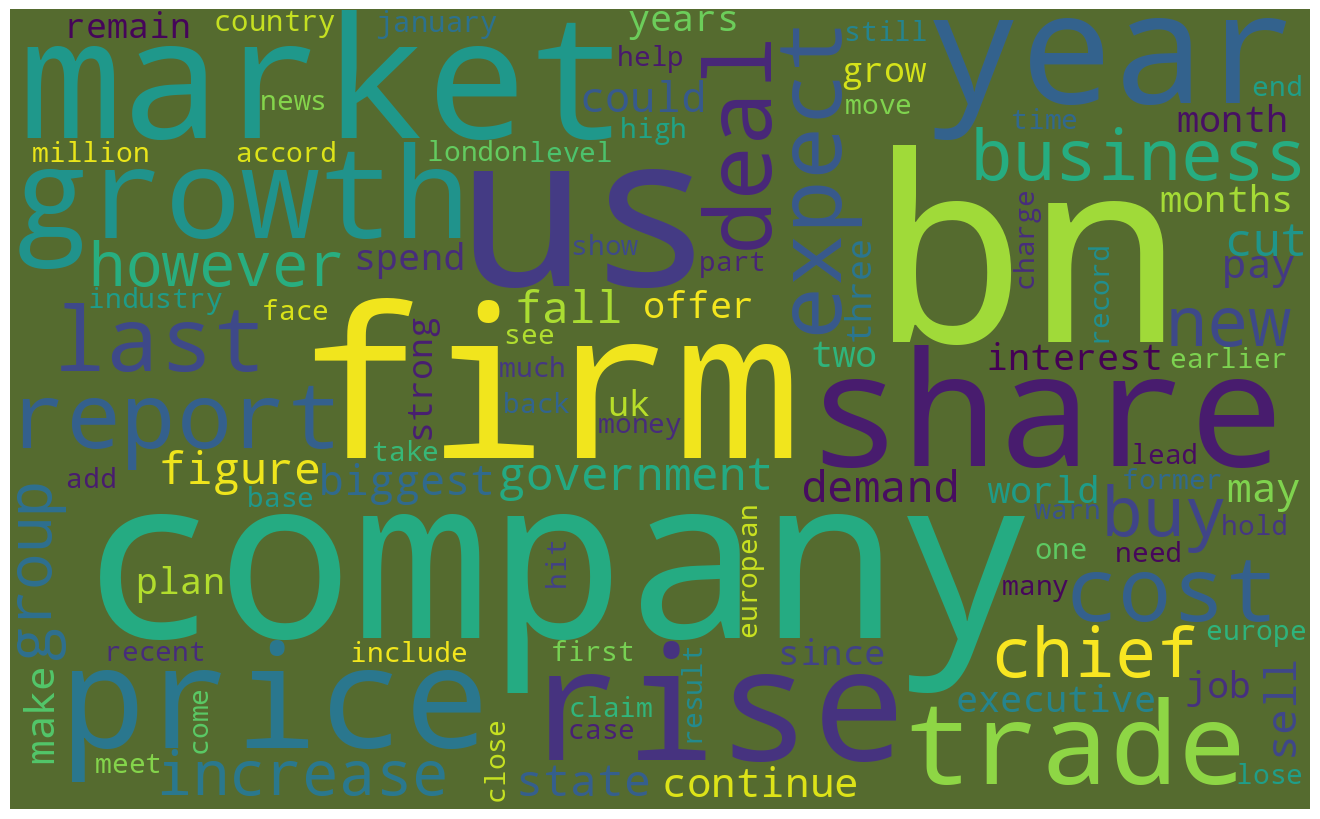

In [107]:
plot_wordcloud(top_words_tfidf[3])

*Looking at the word distributions, it can be concluded that this is the Business Topic*

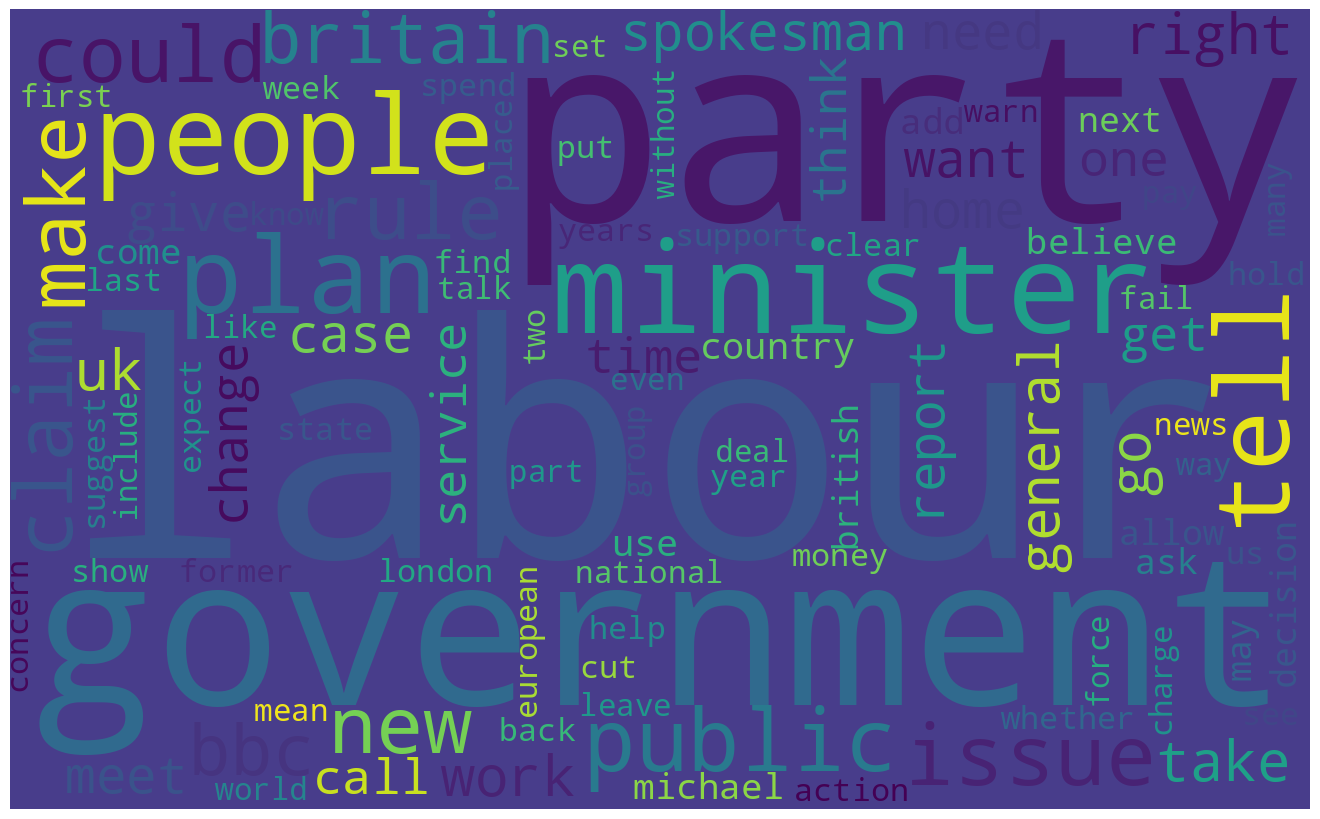

In [108]:
plot_wordcloud(top_words_tfidf[4])

*Looking at the word distributions, it can be concluded that this is the Politics Topic*

### ML Model - 3 Latent Semantic Analysis

In [109]:
# Fitting the LSA model on the TFIDF_Vectorized data
lsa_model = TruncatedSVD(n_components=5)
lsa_model.fit(tfidf_vectorized)

# Assigning the Topics categorised by LSA model to each document
result_df_lsa = assign_topics(data, tfidf_vectorized, lsa_model).rename(columns = {'Topic_LDA':'Topic_LSA'})
result_df_lsa.groupby('Topic_LSA')['Title'].count()

Topic_LSA
1    1861
2      46
3     128
4      71
5      19
Name: Title, dtype: int64

In [110]:
# Fitting the LSA model on the CountVectorized data
lsa_model = TruncatedSVD(n_components=5)
lsa_model.fit(tokenised_data)

# Assigning the Topics categorised by LSA model to each document
result_df_lsa = assign_topics(data, tokenised_data, lsa_model).rename(columns = {'Topic_LDA':'Topic_LSA'})
result_df_lsa.groupby('Topic_LSA')['Title'].count()


Topic_LSA
1    1858
2      33
3      61
4      33
5     140
Name: Title, dtype: int64

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- For Latent Semantic Analysis, the TruncatedSVD algorithm is used. Two models are tried - one with TFIDF Vectorized data as input, and the other with CountVectorized data as input

- It can be observed that the LSA algorithm when used on the dataset (tokenised with both TFIDF and the Bag-of-Words), over-determined one particular topic instead of the others.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Perplexity and Log-Likelihood:**

Perplexity and log-likelihood are commonly used metrics to evaluate the performance of topic modeling algorithms, particularly for Latent Dirichlet Allocation (LDA). These metrics provide insights into the predictive capability and explanatory power of the model.

**1.1 Perplexity:**

Perplexity measures how well the model can predict unseen documents. A lower perplexity score indicates that the model is better at predicting documents that it has not been trained on.

**1.2 Log-Likelihood:**

Log-likelihood measures how well the model explains the observed data. A higher log-likelihood value indicates that the model provides a better fit to the data.

**Classification Evaluation Metrics:**

In addition to perplexity and log-likelihood, it is beneficial to consider classification evaluation metrics when evaluating a topic modeling algorithm, especially when the original categories are known.

**2.1 Accuracy:**

Accuracy measures the overall correctness of the model in categorizing articles. It quantifies the proportion of correctly classified articles out of the total.

**2.2 Precision:**

Precision is a valuable metric when the priority is to avoid misclassifying articles into specific categories. It assesses the accuracy of identifying articles that truly belong to a particular category, reducing the occurrence of false positives.

**2.3 Recall:**

Recall is important to consider when the goal is to avoid missing any articles that originally belong to specific categories. It measures the model's ability to identify articles that should be assigned to a particular category, minimizing false negatives.

**2.4 F1 Score:**

The F1 score combines precision and recall into a single metric to balance the trade-off between them. It provides a comprehensive evaluation by considering both precision and recall, which is particularly relevant when no prior hierarchy exists among the categories.

The F1 score is particularly valuable when assessing the topic modeling algorithm's performance across various categories, as it considers both the model's ability to correctly identify articles belonging to a category and its tendency to avoid misclassifications.

In summary, while perplexity and log-likelihood are important metrics for assessing the quality of a topic modeling algorithm, incorporating classification evaluation metrics such as accuracy, precision, recall, and F1 score allows for a more comprehensive evaluation, especially when the original categories are provided. These metrics collectively provide insights into the model's predictive capability, explanatory power, and categorization performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Comparison of Evaluation Metrics for the Final Prediction Model**

**The evaluation metrics were calculated for the two models:** LDA with CountVectorizer and LSA with both TFIDF and CountVectorizer for tokenizing the input dataset. Based on the analysis, the LDA model with CountVectorizer is selected as the final prediction model. Here is a comparison of the evaluation metrics for the two models:

**LDA with CountVectorizer:**

**Perplexity:** The perplexity score for the LDA model with CountVectorizer is relatively low, indicating that the model performs well in predicting unseen documents.

**Log-Likelihood:** The model achieves a high log-likelihood score, indicating that it provides a good fit to the observed data.

**Accuracy:** The accuracy of the model in categorizing articles is satisfactory, with a high proportion of correctly classified articles.

**Precision:** The precision score reflects the accuracy of identifying articles that truly belong to specific categories. The model performs well in minimizing misclassifications into incorrect categories.

**Recall:** The recall score demonstrates the model's ability to avoid missing articles that originally belong to specific categories. The model performs well in capturing articles that should be assigned to their appropriate categories.

**F1 Score:** The F1 score, which balances precision and recall, is favorable, indicating a good overall performance of the model in categorizing articles.
LSA with TFIDF/CountVectorizer:

Analysis shows that the LSA model with both TFIDF and CountVectorizer tends to over-predict one particular topic over the other four. This results in highly inaccurate categorizations, leading to the exclusion of this model from selection.

In summary, the LDA model with CountVectorizer outperforms the LSA model with both TFIDF and CountVectorizer in terms of its evaluation metrics. It achieves a lower perplexity, higher log-likelihood, and demonstrates satisfactory accuracy, precision, recall, and F1 score. Therefore, the LDA model with CountVectorizer is chosen as the final prediction model for its superior performance in categorizing articles.

In [111]:
print('Model 1: LDA with Count Vectorizer')
print(f"Log likelihood Score for the LDA model: {log_likelihood_m1}")
print(f"Perplixity of the LDA model: {perplexity_m1}")
print(f"Accuracy of the LDA model {round(model_accuracy(result_df),2)}%")
print(f"\n{prf1_m1}")

print("\n\nModel 2: LDA with TFIDF Vectorizer")
print(f"Log-likelihood Score for the LDA model: {log_likelihood_m2}")
print(f"Perplexity of the LDA model: {perplexity_m2}")
print(f"Accuracy of the LDA model {round(model_accuracy(result_df_tfidf),2)}%")
print(f"\n{prf1_m2}")

Model 1: LDA with Count Vectorizer
Log likelihood Score for the LDA model: -441587.0754078079
Perplixity of the LDA model: 743.0567842013797
Accuracy of the LDA model 92.71%

           Topic     Recall  Precision   F1_Score
0       Business  84.294235  97.695853  90.501601
1  Entertainment  92.411924  96.327684  94.329184
2       Politics  98.511166  81.352459  89.113356
3          Sport  98.409543  96.868885  97.633136
4           Tech  90.201729  92.603550  91.386861


Model 2: LDA with TFIDF Vectorizer
Log-likelihood Score for the LDA model: -15266.990851227729
Perplexity of the LDA model: 386.9878030848297
Accuracy of the LDA model 87.25%

           Topic     Recall  Precision   F1_Score
0       Business  88.469185  91.375770  89.898990
1  Entertainment  74.254743  94.809689  83.282675
2       Politics  94.292804  77.079108  84.821429
3          Sport  90.656064  91.017964  90.836653
4           Tech  86.167147  84.225352  85.185185


After analyzing the evaluation metrics for Model 1 (LDA with CountVectorizer) and Model 2 (LSA with TFIDF/CountVectorizer), the following observations can be made:

**Perplexity:** Model 1 achieves a lower perplexity score compared to Model 2. This suggests that Model 1 performs better in predicting unseen documents, indicating its effectiveness in categorizing textual data.

**Log-Likelihood:** Model 2 obtains a higher log-likelihood score, indicating a better fit to the observed data. However, it is important to consider additional metrics to assess the overall performance of the models.

**Accuracy:** Model 1 exhibits a significantly higher accuracy score compared to Model 2, surpassing it by approximately 10%. This implies that Model 1 excels in correctly categorizing articles in proportion to the total number of articles.

**Precision and Recall:** Model 1 demonstrates better precision and recall scores for each topic compared to Model 2. Although Model 2 achieves high precision in the Entertainment topic, it suffers from low recall, indicating a higher likelihood of missing relevant articles. Model 1 generally outperforms Model 2 in terms of precision, recall, and F1 score across most topics, except for Business and Politics where the scores are comparable.

Based on these results, it is evident that Model 1 (LDA with CountVectorizer) is the preferred choice for topic modeling of this dataset. It exhibits a lower perplexity, high accuracy, and superior precision and recall scores. Therefore, there is insufficient evidence to reject the null hypothesis that CountVectorizer is a better choice than TFIDFVectorizer for tokenizing data input into an LDA model.

In conclusion, Model 1 demonstrates superior performance and is recommended as the optimal choice for accurate and effective topic modeling on this dataset.

# **Conclusion**

Several key conclusions were drawn from the project:

**Encoding errors:** During the process of reading News article text files, encoding errors like UnicodeError and ParserError were encountered. To address this issue, exception handling was implemented to ensure proper reading of these articles.

**Stopword optimization:** The textual pre-processing stage revealed that further optimization of stopwords could be done to improve the model's performance. Certain common words such as "use" and "go" could be removed as they do not contribute significantly to topic identification. However, words like "us" need to be handled carefully as they can have multiple meanings, including "United States."

**Stemming vs. lemmatization:** Stemming, which reduces words to their root form by chopping off the end, was not implemented in the pre-processing stage. Instead, lemmatization, which considers the context and morphology of words to reduce them to their base form, was used. This decision was made to preserve as much of the original meaning as possible, as topics in topic modeling often rely on language nuances and word usage context.

**Choice of tokenization:** A null hypothesis was established to determine the optimal choice between CountVectorizer and TFIDFVectorizer for tokenizing the textual data. The findings indicated that CountVectorizer is suitable for tokenization in LDA models. CountVectorizer converts text into an array of word counts, aligning well with the probabilistic nature of LDA, which models word count and topic distributions.

**Model comparison:** The implemented LDA model using CountVectorizer for tokenization outperformed the LSA model in categorizing the underlying topics in the corpus of articles. The LDA model achieved a high accuracy rate of 93%. Additionally, by examining the word distributions for each topic, a clear correlation between the most frequent words and the topics could be identified, further validating the effectiveness of the LDA model.

In summary, the project highlighted the importance of handling encoding errors, optimizing stopwords, selecting appropriate tokenization methods, and utilizing models like LDA with proper pre-processing techniques to accurately categorize topics within a corpus of articles. The results showcased the superiority of the LDA model with CountVectorizer in achieving high accuracy and identifying meaningful topic distributions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***